#Final Project

Customer Personality Analysis

Dataset : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install scikit-learn==1.2.0 imbalanced-learn==0.10.1

In [105]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.preprocessing import StandardScaler

In [106]:
import warnings
warnings.filterwarnings("ignore")

In [107]:
df = pd.read_csv('/content/drive/MyDrive/Finalproject/marketing_campaign.csv', delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


delimiter='\t' gunanya untuk memisahkan dengan tab (tab-delimited), bukan koma.

#Data Understanding dan Goals
Latar belakang : Analisis Kepribadian Pelanggan adalah analisis terperinci tentang pelanggan ideal perusahaan. Ini membantu bisnis untuk lebih memahami pelanggannya dan memudahkan mereka untuk memodifikasi produk sesuai dengan kebutuhan, perilaku, dan kekhawatiran spesifik dari berbagai jenis pelanggan.
Analisis kepribadian pelanggan membantu bisnis untuk memodifikasi produknya berdasarkan target pelanggannya dari berbagai jenis segmen pelanggan.

Masalah : Bagaimana cara menargetkan segmen pelanggan yang tepat untuk menghemat biaya pemasaran.

Target : Memprediksi respons pelanggan terhadap kampanye pemasaran berdasarkan data historis.

tujuan : menganalisis respons pelanggan terhadap kampanye pemasaran dan membuat prediksi tentang respons di masa depan menggunakan model machine learning.

📊 About Dataset

**Orang**

ID: Pengenal unik pelanggan

Year_Birth: Tahun kelahiran pelanggan

Education: Tingkat pendidikan pelanggan

Marital_Status: Status pernikahan pelanggan

Income: Penghasilan rumah tangga tahunan pelanggan

Kidhome:Anak Jumlah anak dalam rumah tangga pelanggan

Teenhome: Jumlah remaja dalam rumah tangga pelanggan

Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan

Recency: Jumlah hari sejak pembelian terakhir pelanggan

Complain: 1 jika pelanggan komplain dalam 2 tahun terakhir, 0 jika tidak

**Produk**

MntWines: Jumlah yang dibelanjakan untuk wine dalam 2 tahun terakhir

MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir

MntMeatProducts: Jumlah yang dibelanjakan untuk daging dalam 2 tahun terakhir

MntFishProducts: Jumlah yang dibelanjakan untuk ikan dalam 2 tahun terakhir

MntSweetProducts: Jumlah yang dibelanjakan untuk makanan manis dalam 2 tahun terakhir

MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

**Promosi**

NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon

AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak

AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye ke-2, 0 jika tidak

AcceptedCmp3: 1 jika pelanggan menerima penawaran pada kampanye ke-3, 0 jika tidak

AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye ke-4, 0 jika tidak

AcceptedCmp5: 1 jika pelanggan menerima penawaran di kampanye ke-5, 0 jika tidak

Response: 1 jika pelanggan menerima penawaran di kampanye terakhir, 0 jika tidak

**Tempat**

NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan

NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog

NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko

NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam satu bulan terakhir


#Data Cleaning

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

penjelasan

- dataset memiliki 29 kolom dan 2240 baris, dan ada missing value pada kolom income.
- type data masih belum sesuai Dt_Customer harus di ganti menjadi datetime
- terdapat missing value di kolom income, akan dilakukan pengelolahan lebih lanjut di proses selanjutnya

In [109]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [110]:
# jumlah nilai yang hilang per kolom
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


ada data yang hilang pada kolom income sebanyak 24 lalu saya akan mendrop

In [111]:
#mendrop missing value
df = df.dropna()
df.shape

(2216, 29)

In [112]:
# Mengubah kolom Dt_Customer menjadi tipe datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

merubah menjadi datetime karna pada type sebelumnya adalah object

In [113]:
#duplicates
df.duplicated(subset='ID').sum()

0

setelah dicek ternyata tidak memiliki duplicated

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

setalah dicleaning dataset menjadi memiliki 2216 baris

In [115]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


#Data Manipulation

In [116]:
# drop ID column
df = df.drop(['ID', 'Z_Revenue', 'Z_CostContact'], axis = 1)

saya mendrop kolom ID karna tidak memberikan nilai dalam analisis data. dan kolom Z_Revenue ,  Z_CostContact tidak memiliki nilai yang berguna untuk dianalisis karna dalam 1 kolom memiliki nilai yang sama

In [117]:
#Buat kolom 'usia' dengan mengurangkan 'tahun_lahir' dari tahun saat ini
df['age'] = 2024 - df['Year_Birth']

In [118]:
# drop Year_Birth column
df = df.drop(['Year_Birth'], axis = 1)

Year_Birth saya hapus karna saya ganti dengan age agar lebih mudah mengetahui usia

In [119]:
df.columns.tolist()

['Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'age']

In [120]:
#Ubah nama kolom agar konsistensi
df.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)

In [121]:
df.columns.tolist()

['education',
 'marital_status',
 'income',
 'kidhome',
 'teenhome',
 'dt_customer',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'complain',
 'response',
 'age']

In [122]:
df.head()

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,67
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,70
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,59
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,40
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,43


#Exploratory Data Analysis

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   education            2216 non-null   object        
 1   marital_status       2216 non-null   object        
 2   income               2216 non-null   float64       
 3   kidhome              2216 non-null   int64         
 4   teenhome             2216 non-null   int64         
 5   dt_customer          2216 non-null   datetime64[ns]
 6   recency              2216 non-null   int64         
 7   mntwines             2216 non-null   int64         
 8   mntfruits            2216 non-null   int64         
 9   mntmeatproducts      2216 non-null   int64         
 10  mntfishproducts      2216 non-null   int64         
 11  mntsweetproducts     2216 non-null   int64         
 12  mntgoldprods         2216 non-null   int64         
 13  numdealspurchases    2216 non-null   i

**Statistical Summary**

In [124]:
# Mengkelompokan data berdasarkan numeric dan kategorik
numerik = ['age', 'income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth', 'response']
kategorik = ['education', 'marital_status', 'acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'complain']

- untuk kolom numerik memiliki 17 kolom
- untuk kolom kategorik memiliki 8 kolom
- untuk kolom dt_customer tidak dimasukan karena memiliki type data datetime64

In [125]:
# Menetapkan opsi Pandas untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)        # Menampilkan secara penuh tanpa pemotongan
pd.set_option('display.max_rows', None)     # Menampilkan semua baris (opsional, bisa disesuaikan)

# Menampilkan deskripsi kolom numerik
df[numerik].describe()

,age,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,55.179603,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.150271
std,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.357417
min,28.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,54.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,65.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,131.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


jika dilihat dari describe memiliki usia 130 itu tidak masuk akal maka saya akan memfilter < 83 th karna 83 adalah batas atas (upper_bound)

In [126]:
IQR = df['age'].quantile(0.75) - df['age'].quantile(0.25)  # Menghitung IQR
upper_bound = df['age'].quantile(0.75) + IQR
upper_bound

83.0

In [127]:
# Menyaring data untuk usia < 90 tahun
df = df[df['age'] <= 83]

In [128]:
# Menampilkan deskripsi kolom numerik
df[numerik].describe()

,age,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,response
count,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000,2212.000000
mean,55.069620,52237.076854,0.442134,0.505877,48.986438,305.226492,26.335895,167.034810,37.652351,27.047016,43.928571,2.325949,4.088156,2.672242,5.806058,5.321881,0.150542
std,11.686685,25184.285561,0.537004,0.544253,28.931145,337.364344,39.740972,224.251065,54.769810,41.090699,51.705148,1.924630,2.742187,2.927542,3.251260,2.425630,0.357683
min,28.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,35233.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,54.000000,51381.500000,0.000000,0.000000,49.000000,175.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,65.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,83.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000



age

- Mean (55.19) > Median (54): Distribusi data ini cenderung right-skewed.

- Nilai minimum (28) dan maksimum (84): Menunjukkan variasi usia pelanggan dari dewasa muda hingga lanjut usia.

income

- Mean (52357.79) > Median (51533.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (1730) dan maksimum (666666): Menunjukkan perbedaan pendapatan yang sangat besar di antara pelanggan, dengan beberapa pelanggan berpenghasilan sangat tinggi.

kidhome

- Mean (0.44) > Median (0.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (2): Menunjukkan jumlah anak kecil di rumah pelanggan berkisar dari 0 hingga 2.

teenhome

- Mean (0.51) > Median (0.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (2): Menunjukkan jumlah remaja di rumah pelanggan berkisar dari 0 hingga 2.

recency

- Mean (48.84) ≈ Median (49.00): Distribusi data ini relatif simetris yang artinya Mean hampir sama dengan median

- Nilai minimum (0) dan maksimum (99): Menunjukkan variasi besar dalam berapa lama sejak pelanggan terakhir berbelanja.

mntwines

- Mean (305.18) > Median (175.50): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (1493): Menunjukkan variasi besar dalam pengeluaran untuk anggur.

mntfruits

- Mean (26.29) > Median (8.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (199): Menunjukkan variasi besar dalam pengeluaran untuk buah-buahan.

mntmeatproducts

- Mean (167.76) > Median (68.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (1725): Menunjukkan variasi besar dalam pengeluaran untuk produk daging.

mntfishproducts

- Mean (37.45) > Median (12.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (259): Menunjukkan variasi besar dalam pengeluaran untuk produk ikan.

mntsweetproducts

- Mean (27.14) > Median (8.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (262): Menunjukkan variasi besar dalam pengeluaran untuk produk manis.

mntgoldprods

- Mean (43.80) > Median (24.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (321) : menjunjukan banyak yang membeli emas.

numdealspurchases

- Mean (2.33) > Median (2): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (15): menunjukan banyak yang membeli mengunakan diskon.

numwebpurchases

- Mean (4.09) = Median (4.00): Distribusi data ini relatif simetris yang artinya Mean hampir sama dengan median.

- Nilai minimum (0) dan maksimum (27): banyak yang mendapatkan informasi melalui situs web perusahaan.

numcatalogpurchases

- Mean (2.67) > Median (2.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (28): Menunjukkan variasi besar dalam jumlah pembelian melalui katalog.

numstorepurchases

- Mean (5.78) > Median (5.00): Distribusi data ini cenderung right-skewed.

- Nilai minimum (0) dan maksimum (13): Menunjukkan variasi besar dalam jumlah pembelian di toko.

numwebvisitsmonth

- Mean (5.32) < Median (6.00): Distribusi data ini cenderung left-skewed.

- Nilai minimum (0) dan maksimum (20): Menunjukkan variasi besar dalam jumlah kunjungan web bulanan.




In [129]:
df[kategorik].astype('category').describe()

,education,marital_status,acceptedcmp1,acceptedcmp2,acceptedcmp3,acceptedcmp4,acceptedcmp5,complain
count,2212,2212,2212,2212,2212,2212,2212,2212
unique,5,8,2,2,2,2,2,2
top,Graduation,Married,0,0,0,0,0,0
freq,1116,857,2070,2182,2049,2048,2051,2192


penjelasan:

- education : didalam kolomnya berisi Graduation, PhD, Master, Basic, 2n Cycle.
kategori teratas Graduation dan Graduation muncul sebanyak 1019 kali.

- marital_status : didalam kolomnya berisi Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO.
kategori teratas Married dan Married muncul sebanyak 788 kali.

- AcceptedCmp1 - AcceptedCmp5: Kolom ini menunjukkan apakah seseorang menerima tawaran pada kampanye tertentu atau tidak (0 = Tidak menerima, 1 = Menerima).Sebagian besar kategori bernilai 0 (tidak menerima kampanye).

- Complain: Kolom ini menunjukkan apakah individu mengajukan keluhan (0 = Tidak mengeluh, 1 = Mengeluh). Kategori teratas adalah 0 (tidak mengajukan keluhan).
Sebanyak 2192 individu tidak mengajukan keluhan.


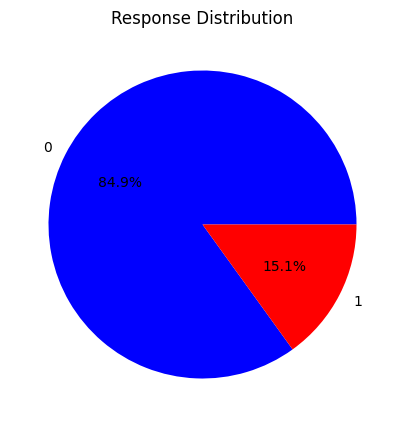

In [130]:
# Hitung persentase value_counts
counts = df['response'].value_counts(normalize=True).reset_index()
counts.columns = ['response', 'percentage']

# Visualisasi menggunakan pie chart
counts.set_index('response', inplace=True)
plt.figure(figsize=(8, 5))
counts['percentage'].plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Response Distribution')
plt.ylabel('')
plt.show()

Jika dilihat dari data Response, maka dapat disimpulkan bahwa target merupakan imbalance. Ketidakseimbangan seperti ini sering dianggap sebagai masalah dalam pemodelan. untuk dianalisis lebih lanjut akan  mengunakan heandling imbalance dibagian Data Preprocessing.

##Analisis univariat

In [131]:
# Membuat histogram untuk setiap kolom numerik
numerik = df.select_dtypes(include=['float64', 'int64']).columns
print(numerik)

Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits', 'mntmeatproducts',
       'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2', 'complain',
       'response', 'age'],
      dtype='object')


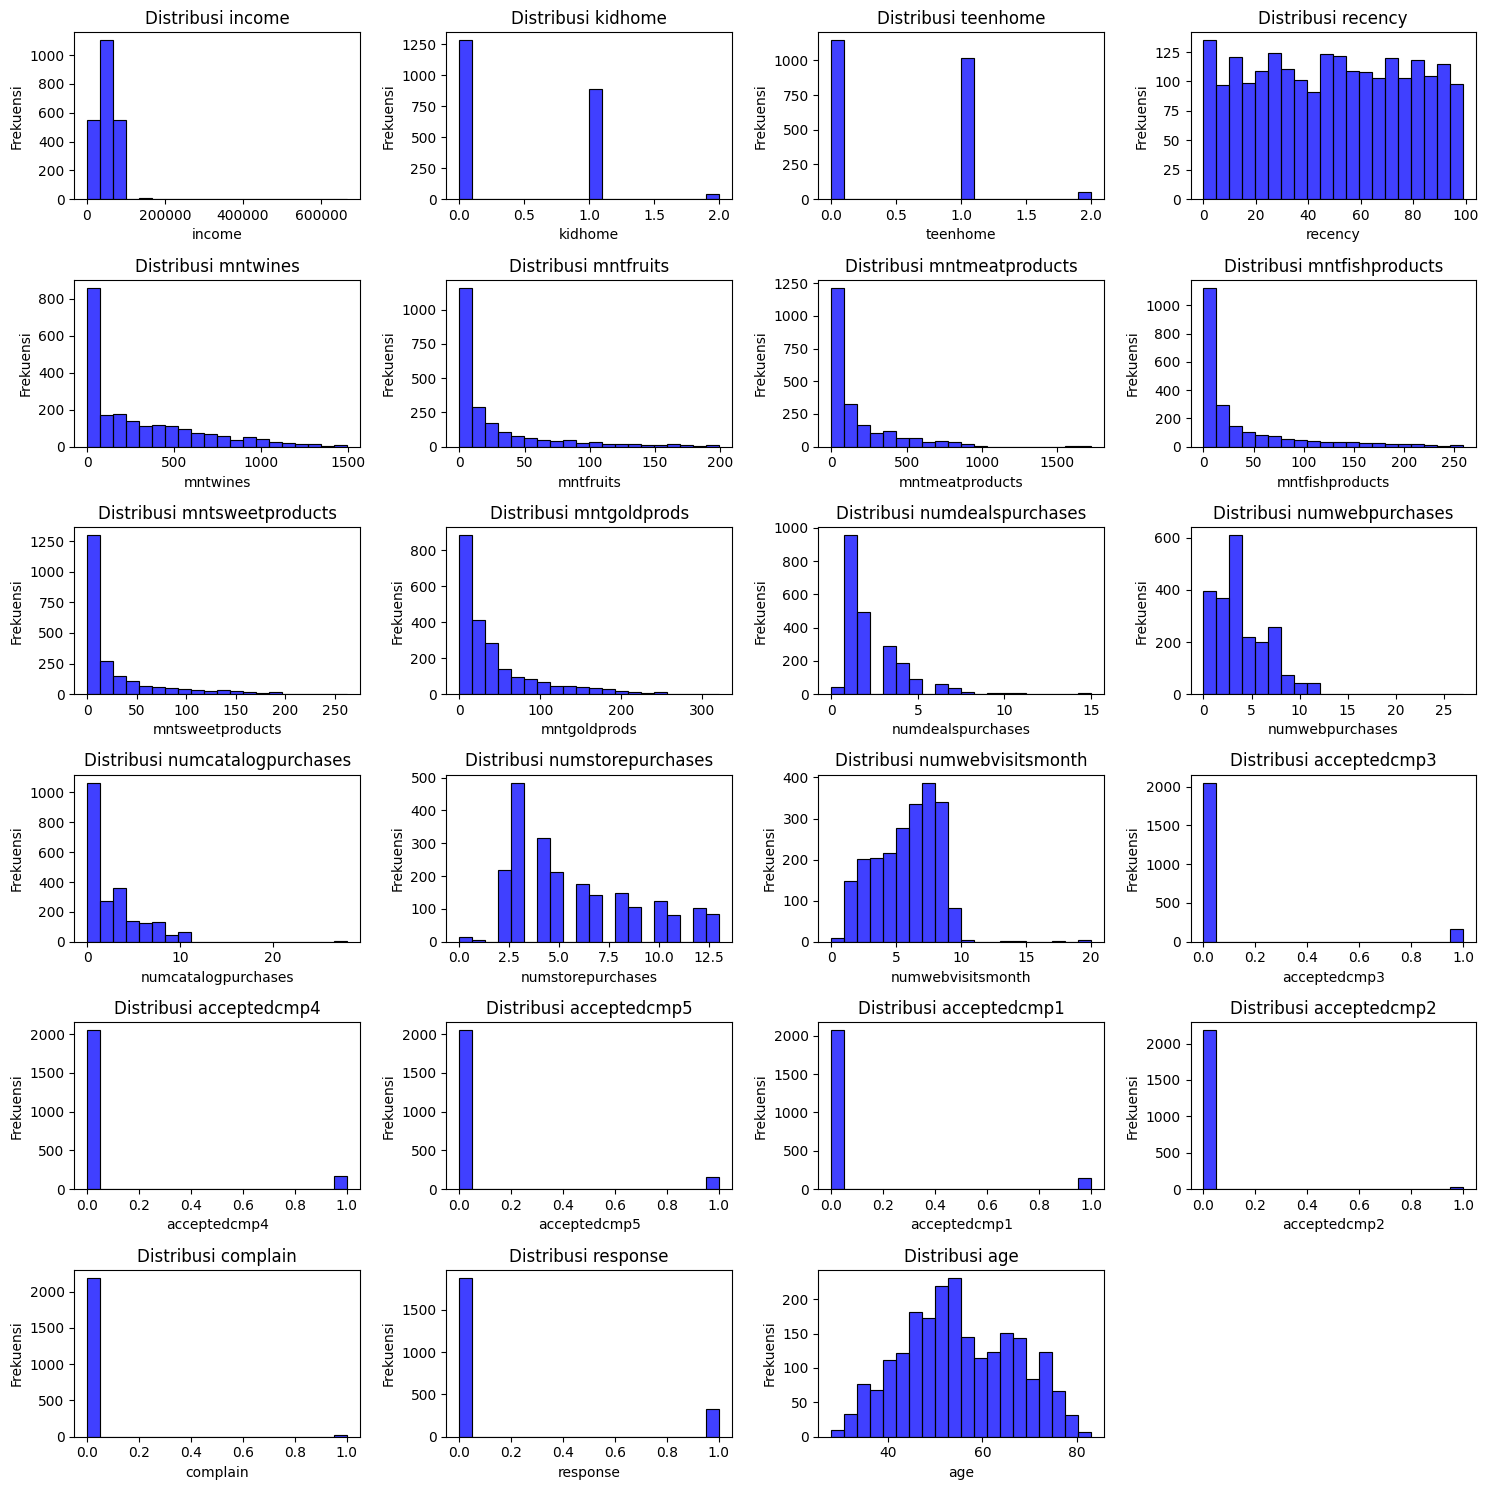

In [132]:
fig, axes = plt.subplots(len(numerik) // 4 + 1, 4, figsize=(15, 15))  # Atur grid layout
axes = axes.flatten()  # Flatten untuk iterasi lebih mudah

for i, col in enumerate(numerik):
    sns.histplot(data=df[col], ax=axes[i], kde=False, color='blue', bins=20)  # Ganti ke histplot
    axes[i].set_title(f'Distribusi {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Hapus subplot kosong jika jumlah kolom numerik tidak sesuai dengan grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()




- income ; Pendapatan responden mayoritas berada di bawah 100.000.

- kidhome : Sebagian besar responden tidak memiliki anak di rumah, namun ada beberapa memili 1 anak dan sedikit yang memiliki 2 anak.

- teenhome ; mayoritas tidak memiliki remaja di rumah, dengan sebagian memiliki 1 remaja dan sangat sedikit yang memiliki 2 remaja.

- recency ; Respon terhadap interaksi terakhir tersebar merata dalam rentang 0-100.

- mntwines ; Sebagian besar pelanggan menghabiskan sedikit untuk anggur, dengan beberapa outlier pengeluaran sangat tinggi.

- mntfruits ; Pengeluaran untuk buah sebagian besar rendah, dengan hanya sedikit yang mencapai pengeluaran tinggi.

- mntmeatproducts ; Sebagian besar pengeluaran daging berada di rentang rendah, dengan beberapa pelanggan memiliki pengeluaran besar.

- mntfishproducts ; Sebagian besar pelanggan menghabiskan sangat sedikit untuk produk ikan, dengan beberapa pengeluaran lebih besar.

- mntsweetproducts ; Pengeluaran untuk produk manis mayoritas kecil, dengan sangat sedikit pelanggan menghabiskan lebih dari 200.

- mntgoldprods ; Sebagian besar pengeluaran untuk produk emas sangat rendah, dengan beberapa outlier tinggi.

- numdealspurchases ; Mayoritas pembelian dengan penawaran berada di kisaran rendah (0-5).

- numwebpurchases ; Sebagian besar pelanggan melakukan sedikit pembelian online (di bawah 5).

- numcatalogpurchases ; Pembelian melalui katalog sangat jarang, dengan mayoritas di bawah 5.

- numstorepurchases ; Pembelian di toko menunjukkan pola lebih merata, puncaknya di kisaran 5-6.

- numwebvisitsmonth ; Kunjungan web bulanan mayoritas berada di kisaran 3-8 kali.

- age ; usia pelanggan yang mayoritas berada di kisaran usia 40 hingga 70 tahun, dengan puncak terbanyak di sekitar usia 60 tahun.

**pertanyaan : Pada rentang pendapatan berapa sebagian besar pelanggan memberikan respon terhadap kampanye?**

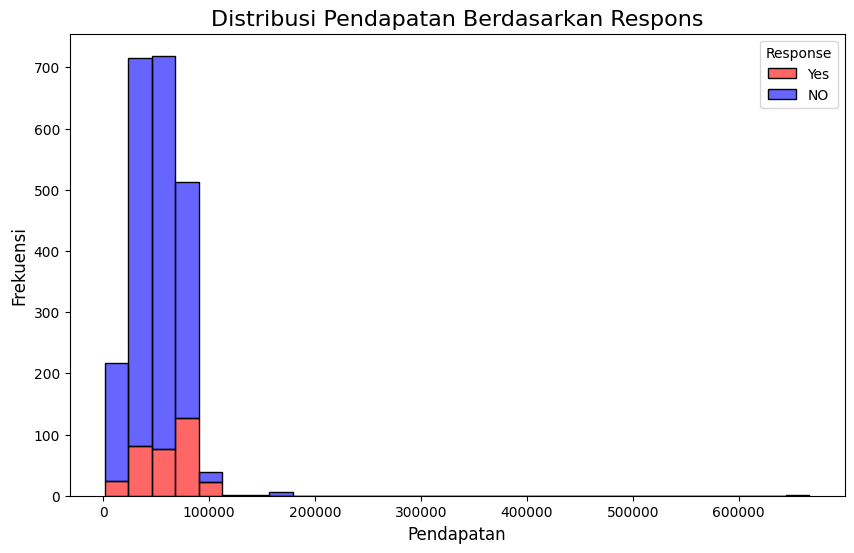

In [133]:
# Distribusi Pendapatan (Income) Berdasarkan Response menggunakan histogram
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='income',
    hue='response',
    bins=30,  # Jumlah bin (sesuaikan sesuai kebutuhan)
    palette=['blue', 'red'],
    alpha=0.6,
    multiple='stack'  # Menumpuk histogram berdasarkan kategori
)
plt.title('Distribusi Pendapatan Berdasarkan Respons', fontsize=16)
plt.xlabel('Pendapatan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend(title='Response', labels=['Yes', 'NO'])
plt.show()


secara keseluhan pendapatan mirip antara repson yes dan no tetapi sedikit terlihat bahwa yang responnya yes pendapatannya lebih tinggi dari pada No

**pertanyaan : Berapa Usia dan Pendapatan Pelanggan yang Merespons Kampanye Pemasaran dibandingkan dengan yang Tidak Merespons ?**

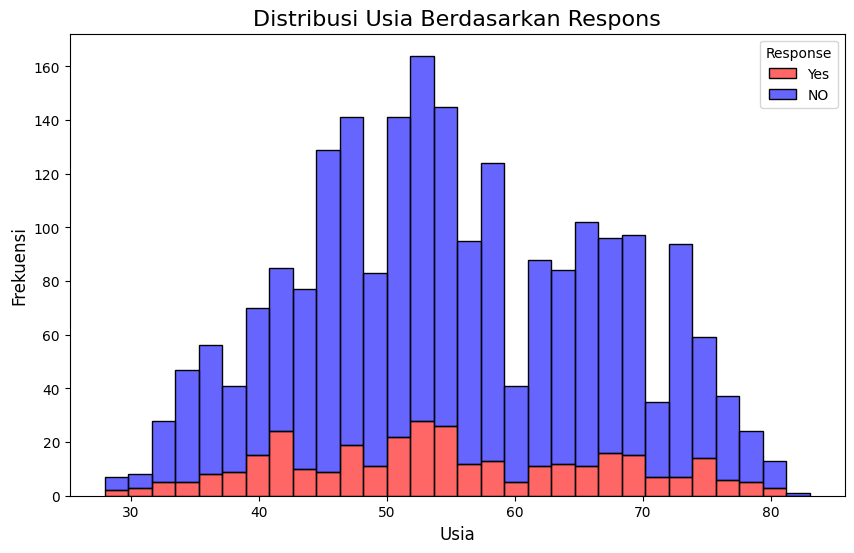

In [134]:
#Distribusi Usia (Age) Berdasarkan Response
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x='age',
    hue='response',
    bins=30,  # Menentukan jumlah bin
    palette=['blue', 'red'],
    alpha=0.6,
    multiple='stack'  # Menumpuk histogram berdasarkan kategori
)
plt.title('Distribusi Usia Berdasarkan Respons', fontsize=16)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend(title='Response', labels=['Yes', 'NO'])
plt.show()


secara keseluhan  tidak ada pengaruh usia yang signifikan dalam merespon kampanye pemasaran.


**pertanyaan : Bagaimana distribusi pembelian anggur (MntWines) antara pelanggan yang merespons dan tidak merespons kampanye pemasaran?**

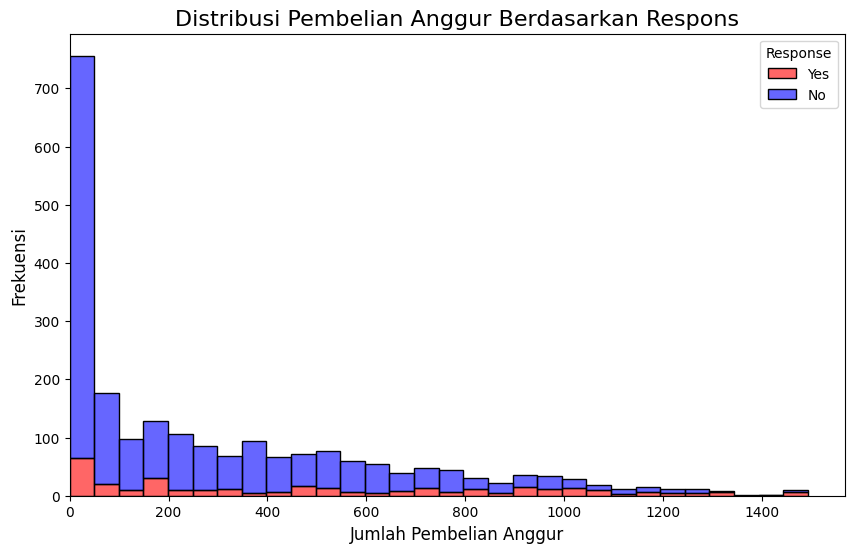

In [135]:
# Membuat figure dan ukuran plot
plt.figure(figsize=(10, 6))

# Membuat histogram dengan clip (mulai dari 0) dan hue untuk membagi kategori respons
sns.histplot(
    data=df,
    x='mntwines',
    hue='response',
    bins=30,  # Jumlah bin untuk histogram
    palette=['blue', 'red'],
    alpha=0.6,
    multiple='stack'  # Menumpuk histogram berdasarkan kategori respons
)

# Menambahkan judul dan label pada plot
plt.title('Distribusi Pembelian Anggur Berdasarkan Respons', fontsize=16)
plt.xlabel('Jumlah Pembelian Anggur', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)

# Menambahkan legenda untuk 'response'
plt.legend(title='Response', labels=['Yes', 'No'])

# Membatasi sumbu x mulai dari 0
plt.xlim(0)

# Menampilkan plot
plt.show()

telihat bahwa pelanggan dengan respon "No" memiliki jumlah pembelian anggur yang lebih kecil dibandingkan dengan pelanggan dengan respon "Yes".


**Pengaruh Pendidikan (Education) Terhadap Kemungkinan Merespons Kampanye Pemasaran**

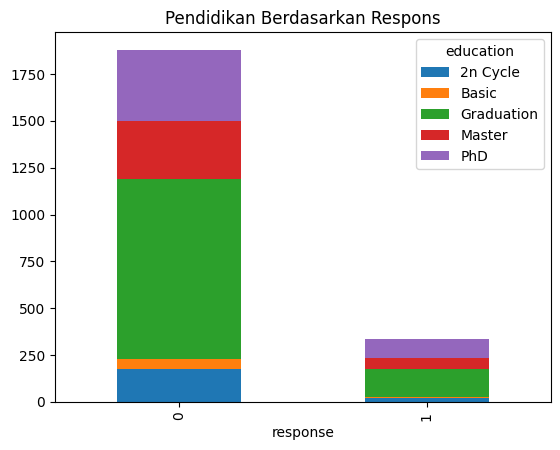

In [136]:
#Frekuensi Pendidikan (Education) Berdasarkan Response
df.groupby('response')['education'].value_counts().unstack().plot(kind='bar', stacked=True, title='Pendidikan Berdasarkan Respons')
plt.show()

Mayoritas responden yang tidak merespons (response = 0) memiliki tingkat pendidikan "Graduation," sedangkan jumlah responden yang memberikan respons (response = 1) jauh lebih sedikit di semua kategori pendidikan.

**Pertanyaan ; Bagaimana distribusi status pernikahan pelanggan yang merespon kampanye?**

In [137]:
jumlah_per_kategori = df['marital_status'].value_counts()
print(jumlah_per_kategori)

marital_status
Married     857
Together    572
Single      469
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [138]:
# Mengganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single'
df['marital_status'] = df['marital_status'].replace(['Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['marital_status'] = df['marital_status'].replace(['Together'],'Married')

 saya menganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single' karena kategori-kategori tersebut memiliki jumlah yang sangat kecil dan dapat dianggap sebagai representasi dari status pernikahan yang mirip dengan 'Single'.

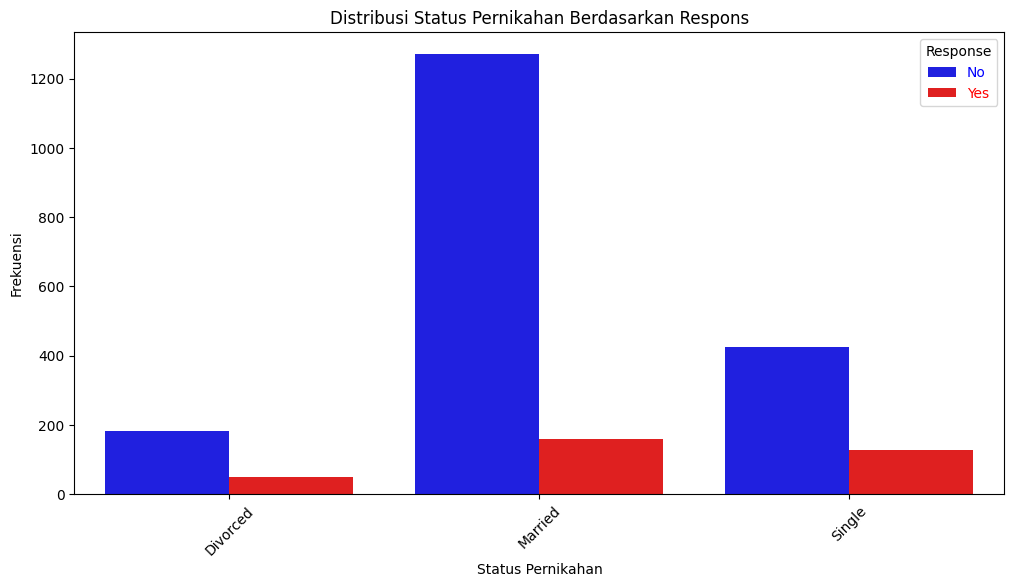

In [139]:
# Menghitung frekuensi untuk setiap kombinasi marital_status dan response
count_data = df.groupby(['marital_status', 'response']).size().reset_index(name='count')

# Mengganti nilai response menjadi "Yes" dan "No" langsung pada plot
count_data['response'] = count_data['response'].replace({1: 'Yes', 0: 'No'})

# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=count_data,
    x='marital_status',
    y='count',
    hue='response',  # Warna untuk "Yes" dan "No"
    palette=['blue', 'red']
)

# Mengatur label x-axis sesuai kategori aslinya
plt.xticks(rotation=45)

plt.title('Distribusi Status Pernikahan Berdasarkan Respons')
plt.xlabel('Status Pernikahan')
plt.ylabel('Frekuensi')
legend_labels = plt.legend(title='Response')
for text, color in zip(legend_labels.get_texts(), ['blue', 'red']):
    text.set_color(color)
plt.show()

Mayoritas responden yang tidak memberikan tanggapan (Response = No) berasal dari kategori "Married," sedangkan kategori lainnya menunjukkan frekuensi tanggapan yang lebih rendah.

##Analisis multivariat

**pertanyaan : Bagaimana distribusi usia dan pendapatan pelanggan yang merespons kampanye pemasaran?**

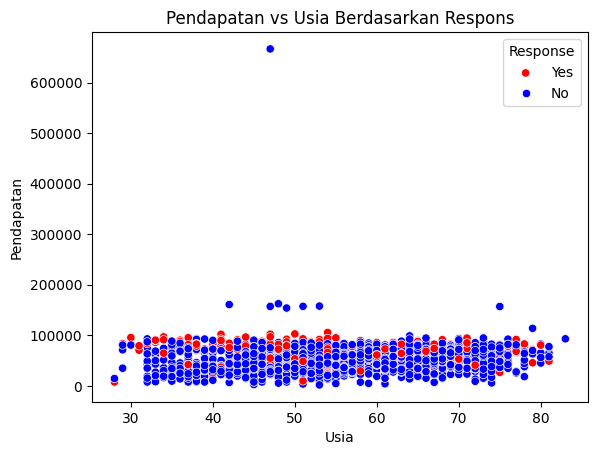

In [140]:
# Scatter plot Pendapatan vs Usia Berdasarkan Response
sns.scatterplot(
    x='age',
    y='income',
    data=df,
    hue='response',
    palette=['blue', 'red']  # Mengatur warna menjadi blue dan red
)
plt.title('Pendapatan vs Usia Berdasarkan Respons')
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.legend(title='Response', labels=['Yes', 'No'])
plt.show()

sebagian besar responden memiliki usia di bawah 80 tahun dengan pendapatan yang lebih rendah.

**pertanyaan : apakah pengeluaran untuk buah-buahan lebih dipengaruhi oleh pola respons pelanggan terhadap kampanye pemasaran?**

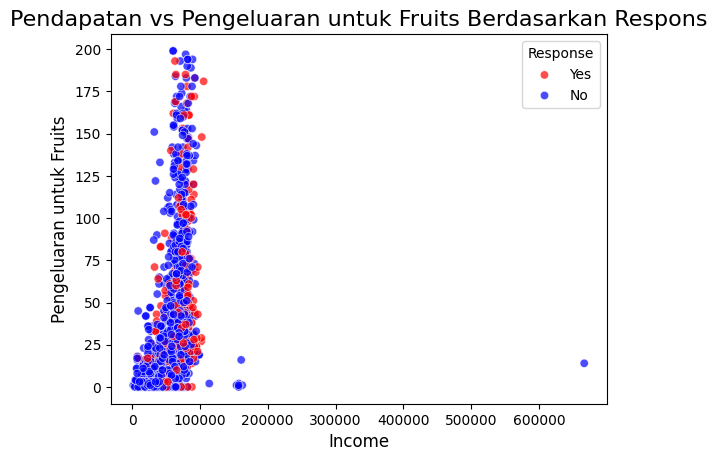

In [141]:
# Scatter plot antara dua variabel numerik dan response
sns.scatterplot(
    x=df['income'],
    y=df['mntfruits'],
    hue=df['response'],
    palette=['blue', 'red'],  # Mengatur warna menjadi blue dan red
    alpha=0.7
)
plt.title('Pendapatan vs Pengeluaran untuk Fruits Berdasarkan Respons', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Pengeluaran untuk Fruits', fontsize=12)
plt.legend(title='Response', labels=['Yes', 'No'])
plt.show()


Pendapatan tidak secara langsung memengaruhi pengeluaran untuk buah-buahan, tetapi pola respons (Yes dan No) menunjukkan kecenderungan pengeluaran yang mirip dalam kelompok.

**pertanyaan : Hubungan antara Jumlah Kunjungan ke Situs Web dan Keputusan untuk Merespons Kampanye Pemasaran**

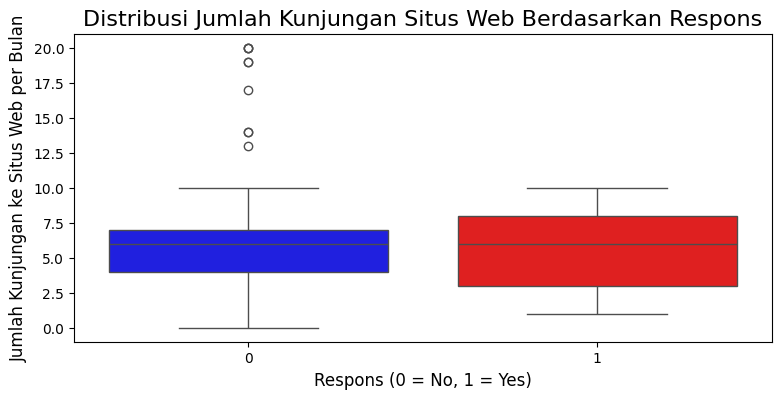

In [142]:
# Box plot untuk melihat distribusi jumlah kunjungan situs web berdasarkan respons kampanye
plt.figure(figsize=(9, 4))
sns.boxplot(
    x='response',
    y='numwebvisitsmonth',
    data=df,
    palette=['blue', 'red']  # Mengatur warna menjadi blue dan red
)
plt.title('Distribusi Jumlah Kunjungan Situs Web Berdasarkan Respons', fontsize=16)
plt.xlabel('Respons (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Jumlah Kunjungan ke Situs Web per Bulan', fontsize=12)
plt.show()

rata-rata kunjungan situs web per bulan lebih tinggi untuk respon "Ya" dibandingkan respon "Tidak".

**pertanyaan : Apakah terdapat perbedaan rata-rata pengeluaran pada setiap kategori produk (seperti wine, fruits, meat, fish, sweet products, dan gold products) antara pelanggan yang merespons kampanye pemasaran dan yang tidak merespons?**

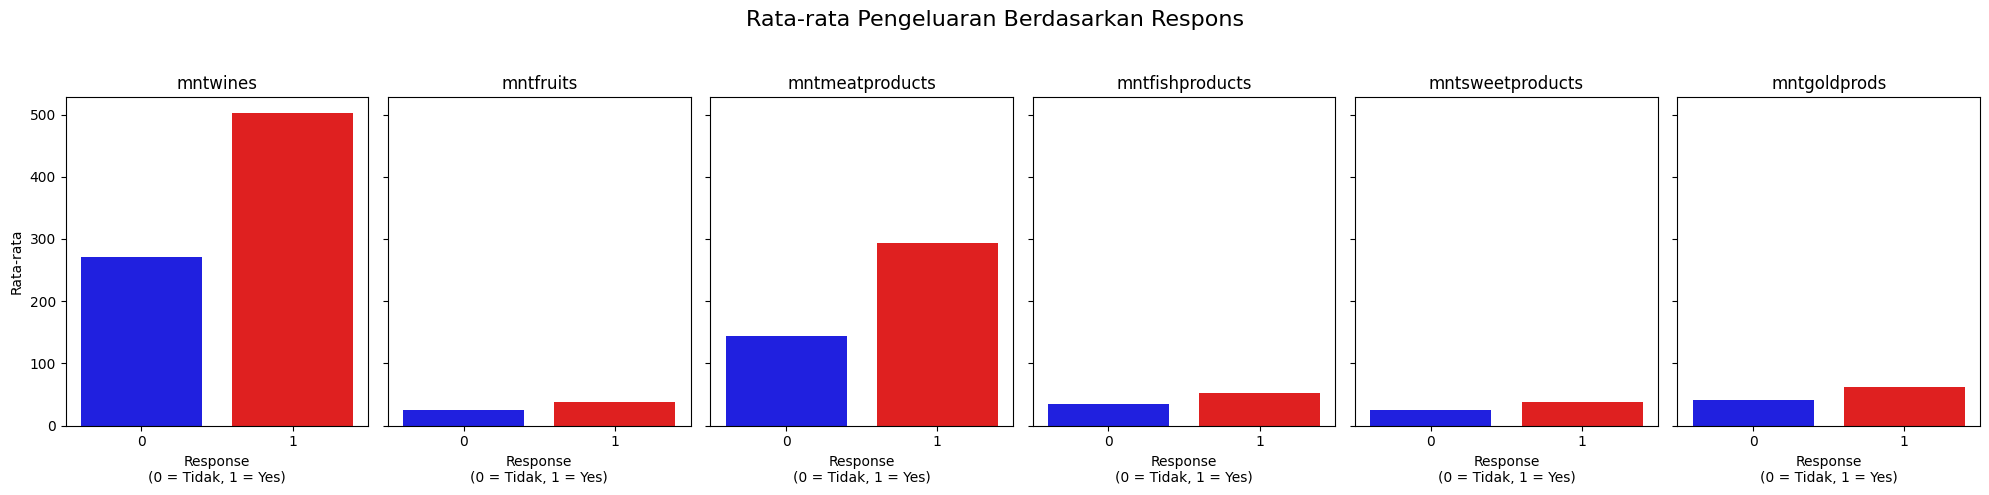

In [143]:
# Barplot rata-rata pengeluaran secara horizontal
spending_cols = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']
fig, axes = plt.subplots(1, len(spending_cols), figsize=(20, 5), sharey=True)

for i, col in enumerate(spending_cols):
    sns.barplot(ax=axes[i], x='response', y=col, data=df, ci=None, palette=['blue', 'red'])
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Response\n(0 = Tidak, 1 = Yes)')
    axes[i].set_ylabel('Rata-rata' if i == 0 else '')

plt.suptitle('Rata-rata Pengeluaran Berdasarkan Respons', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

 terdapat perbedaan, konsumen dengan respons "1" (ya) cenderung memiliki pengeluaran rata-rata yang lebih tinggi untuk hampir semua kategori produk (wine, fruits, meat, fish, sweet products, dan gold products) dibandingkan dengan konsumen dengan respons "0" (tidak)

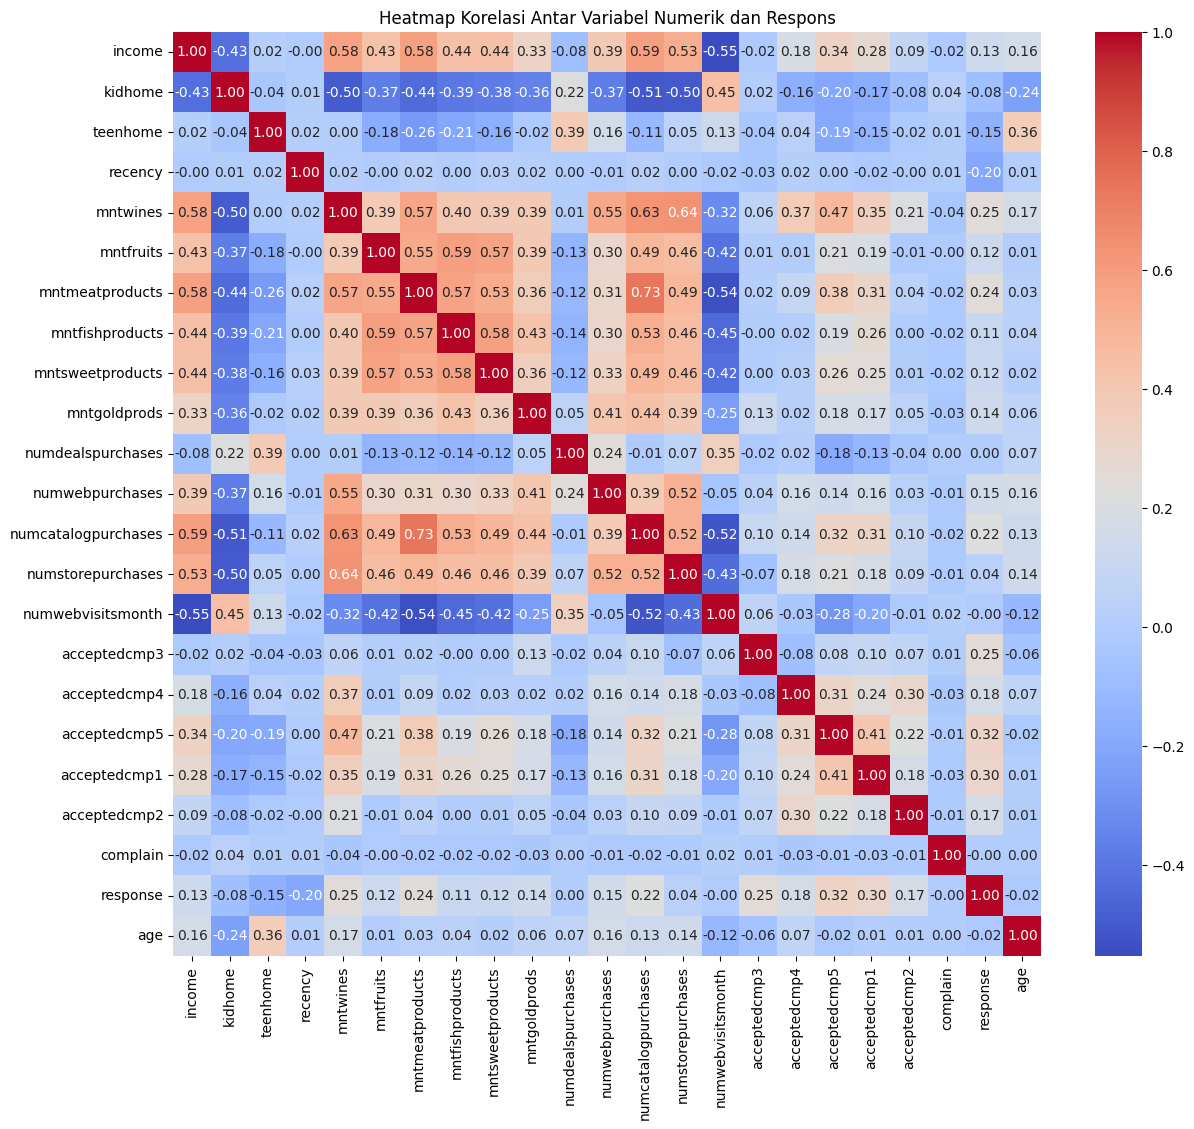

In [144]:
# Tambahkan kolom 'response' ke korelasi
correlation = df[numerik].corr()

# Visualisasi heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Variabel Numerik dan Respons')
plt.show()

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select only numeric features
numeric_features = df.select_dtypes(include=['number']).columns
X = df[numeric_features]

# Add a constant for the regression model
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Feature        VIF
0                 const  61.721534
1                income   2.206895
2               kidhome   1.889299
3              teenhome   1.629083
4               recency   1.061897
5              mntwines   3.349033
6             mntfruits   1.950118
7       mntmeatproducts   3.074262
8       mntfishproducts   2.123974
9      mntsweetproducts   1.921046
10         mntgoldprods   1.507859
11    numdealspurchases   1.671276
12      numwebpurchases   1.991002
13  numcatalogpurchases   3.109482
14    numstorepurchases   2.447581
15    numwebvisitsmonth   2.359458
16         acceptedcmp3   1.159111
17         acceptedcmp4   1.379890
18         acceptedcmp5   1.670421
19         acceptedcmp1   1.360728
20         acceptedcmp2   1.160816
21             complain   1.005013
22             response   1.400174
23                  age   1.254528


tidak ada fitur yang perlu di-drop berdasarkan nilai VIF karna semua fitur memiliki nilai < 4


#Hipotesis

hipotesis dilakukan untuk menguji apakah ada perbedaan rata-rata pengeluaran untuk berbagai kategori produk antara pelanggan yang merespons (respon = 1) dan yang tidak merespons (respon = 0).

In [146]:
import scipy.stats as stats

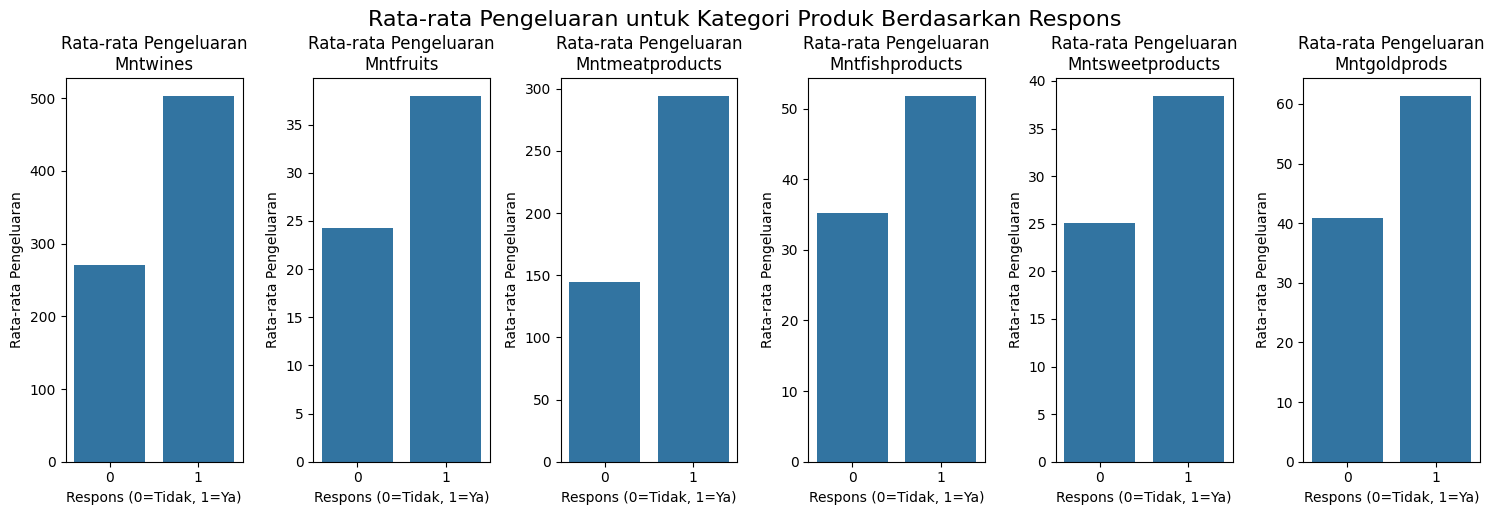

In [147]:
# Kategori produk yang ingin diuji
produk_cols = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']

# Mengatur ukuran figure
plt.figure(figsize=(15, 5))  # Lebar besar untuk side-by-side

# Loop melalui setiap kolom produk
for i, col in enumerate(produk_cols):
    plt.subplot(1, len(produk_cols), i + 1)  # Membuat subplot untuk masing-masing kategori
    sns.barplot(x='response', y=col, data=df, estimator='mean', ci=None)
    plt.title(f"Rata-rata Pengeluaran\n{col.capitalize()}")
    plt.xlabel("Respons (0=Tidak, 1=Ya)")
    plt.ylabel("Rata-rata Pengeluaran")
    plt.tight_layout()

plt.suptitle("Rata-rata Pengeluaran untuk Kategori Produk Berdasarkan Respons", y=1.02, fontsize=16)
plt.show()

In [148]:
# Kategori produk yang ingin diuji
produk_cols = ['mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']

# Menyimpan hasil t-test
ttest_results = []

# Loop melalui setiap kategori produk
for col in produk_cols:
    group1 = df[df['response'] == 1][col]  # Pelanggan yang merespons
    group0 = df[df['response'] == 0][col]  # Pelanggan yang tidak merespons

    # Uji t-test independen
    stat, p_value = stats.ttest_ind(group1, group0)

    # Menyimpan hasilnya ke dalam list
    ttest_results.append({
        'Produk': col,
        'P-value': p_value,
        'Kesimpulan': 'Terdapat perbedaan signifikan antara yang merespons dan yang tidak.' if p_value < 0.05 else 'Tidak terdapat perbedaan signifikan.'
    })

# Membuat DataFrame dari hasil t-test
ttest_df = pd.DataFrame(ttest_results)

# Mengatur lebar kolom agar seluruh teks dapat terbaca
pd.set_option('display.max_colwidth', None)

# Menampilkan DataFrame hasil t-test
ttest_df


,Produk,P-value,Kesimpulan
0,mntwines,6.106822e-32,Terdapat perbedaan signifikan antara yang merespons dan yang tidak.
1,mntfruits,6.579603e-09,Terdapat perbedaan signifikan antara yang merespons dan yang tidak.
2,mntmeatproducts,7.517370e-30,Terdapat perbedaan signifikan antara yang merespons dan yang tidak.
3,mntfishproducts,3.454700e-07,Terdapat perbedaan signifikan antara yang merespons dan yang tidak.
4,mntsweetproducts,4.406734e-08,Terdapat perbedaan signifikan antara yang merespons dan yang tidak.
5,mntgoldprods,2.649597e-11,Terdapat perbedaan signifikan antara yang merespons dan yang tidak.


kesimpulan

karena p-value < 0.05 maka Terdapat perbedaan signifikan antara pelanggan yang merespons dan yang tidak merespons kampanye pemasaran pada semua kategori produk yang diuji (wine, fruits, meat products, fish products, sweet products, dan gold products)

#Feature Engineering

##**Menambahkan kolom total_mnt, total_purchases, everacceptedcmp, dan days_enrolled:**

**total_mnt** : Total pengeluaran pelanggan untuk semua produk (mntwines, mntfruits, mntmeatproducts, mntfishproducts, mntsweetproducts, mntgoldprods)

In [149]:
# Total pengeluaran untuk berbagai produk
df['total_mnt'] = df['mntwines'] + df['mntfruits'] + df['mntmeatproducts'] + df['mntfishproducts'] + df['mntsweetproducts'] + df['mntgoldprods']


**total_purchases**: Jumlah pembelian pelanggan melalui berbagai saluran (numdealspurchases, numwebpurchases, numcatalogpurchases, numstorepurchases)

In [150]:
# Total pembelian berdasarkan saluran
df['total_purchases'] = df['numdealspurchases'] + df['numwebpurchases'] + df['numcatalogpurchases'] + df['numstorepurchases']

**everacceptedcmp**: kolom yang menghitung total campaign yang diterima pelanggan, hasil penjumlahan dari beberapa kolom AcceptedCmp 1 - 5 dan Totalacceptedcmp.


In [151]:
df['Totalacceptedcmp'] = (
    df['acceptedcmp1'] + df['acceptedcmp2'] + df['acceptedcmp3'] + df['acceptedcmp4'] + df['acceptedcmp5']
)
df['everacceptedcmp'] = df['Totalacceptedcmp'].apply(lambda x: 1 if x > 0 else 0)

In [152]:
df.drop(['acceptedcmp1', 'acceptedcmp2', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'Totalacceptedcmp'], axis=1, inplace=True)

**days_enrolled:** Durasi waktu pelanggan terdaftar, membantu menganalisis hubungan antara waktu berlangganan dan aktivitas pembelian.

In [153]:
# Mengambil tanggal maksimal dari kolom 'Dt_Customer'
max_date = df['dt_customer'].max()
max_date

Timestamp('2014-06-29 00:00:00')

In [154]:
# Menghitung jumlah hari sejak menjadi pelanggan
df['days_enrolled'] = (max_date - df['dt_customer']).dt.days

In [155]:
#drop dt_customer
df.drop(['dt_customer'], axis=1, inplace=True)

**cek korelasi antara feature dan response**

In [156]:
# Cek korelasi antara complain dan response
correlation = df['kidhome'].corr(df['response'])
print(f'Correlation between kidhome and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['teenhome'].corr(df['response'])
print(f'Correlation between teenhome and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['income'].corr(df['response'])
print(f'Correlation between income and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['age'].corr(df['response'])
print(f'Correlation between age and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['complain'].corr(df['response'])
print(f'Correlation between complain and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['recency'].corr(df['response'])
print(f'Correlation between recency and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['mntwines'].corr(df['response'])
print(f'Correlation between mntwines and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['mntfruits'].corr(df['response'])
print(f'Correlation between mntfruits and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['mntmeatproducts'].corr(df['response'])
print(f'Correlation between mntmeatproducts and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['mntfishproducts'].corr(df['response'])
print(f'Correlation between mntfishproducts and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['mntsweetproducts'].corr(df['response'])
print(f'Correlation between mntsweetproducts and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['mntgoldprods'].corr(df['response'])
print(f'Correlation between mntgoldprods and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['numdealspurchases'].corr(df['response'])
print(f'Correlation between numdealspurchases and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['numwebpurchases'].corr(df['response'])
print(f'Correlation between numwebpurchases and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['numcatalogpurchases'].corr(df['response'])
print(f'Correlation between numcatalogpurchases and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['numstorepurchases'].corr(df['response'])
print(f'Correlation between numstorepurchases and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['numwebvisitsmonth'].corr(df['response'])
print(f'Correlation between numwebvisitsmonth and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['total_mnt'].corr(df['response'])
print(f'Correlation between total_mnt and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['total_purchases'].corr(df['response'])
print(f'Correlation between total_purchases and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['everacceptedcmp'].corr(df['response'])
print(f'Correlation between everacceptedcmp and Response: {correlation}')

# Cek korelasi antara complain dan response
correlation = df['days_enrolled'].corr(df['response'])
print(f'Correlation between days_enrolled and Response: {correlation}')

Correlation between kidhome and Response: -0.07824793915762097
Correlation between teenhome and Response: -0.15440196033480696
Correlation between income and Response: 0.13329909250058128
Correlation between age and Response: -0.020361182810602157
Correlation between complain and Response: -0.00014490736595787796
Correlation between recency and Response: -0.1997166181319344
Correlation between mntwines and Response: 0.24636610377426657
Correlation between mntfruits and Response: 0.12294980157557418
Correlation between mntmeatproducts and Response: 0.23796063116171934
Correlation between mntfishproducts and Response: 0.10811202804822821
Correlation between mntsweetproducts and Response: 0.11605537335846569
Correlation between mntgoldprods and Response: 0.14107930346203842
Correlation between numdealspurchases and Response: 0.002929471423105074
Correlation between numwebpurchases and Response: 0.15108388867319086
Correlation between numcatalogpurchases and Response: 0.21991236167241326
C

In [157]:
# Menghapus kolom-kolom yang tidak berpengaruh signifikan terhadap response
df.drop(['age', 'complain', 'numdealspurchases', 'numwebvisitsmonth', 'kidhome'], axis=1, inplace=True)


Kolom age, complain, numdealspurchases, numwebvisitsmonth, dan kidhome didrop karena memiliki korelasi sangat rendah dengan Response, sehingga tidak memberikan kontribusi signifikan pada model prediksi.

#**Outlier Handling**

In [158]:
# Menampilkan hanya nama-nama kolom
print(df.columns)


Index(['education', 'marital_status', 'income', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'response', 'total_mnt', 'total_purchases',
       'everacceptedcmp', 'days_enrolled'],
      dtype='object')


In [159]:
numerik_no_dt = ['income', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numwebpurchases',
       'numcatalogpurchases', 'total_mnt', 'total_purchases',
       'everacceptedcmp']

In [160]:
Q1 = df[numerik_no_dt].quantile(0.25)
Q3 = df[numerik_no_dt].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outlier = (df[numerik_no_dt] < lower) | (df[numerik_no_dt] > upper)
outlier_count = outlier.sum(axis=0)
print(f'Jumlah baris outliers')
print(outlier_count)

Jumlah baris outliers
income                   8
mntwines                35
mntfruits              245
mntmeatproducts        173
mntfishproducts        222
mntsweetproducts       246
mntgoldprods           204
numwebpurchases          3
numcatalogpurchases     23
total_mnt                3
total_purchases          2
everacceptedcmp        458
dtype: int64


Terdapat 12 kolom dalam dataset yang memiliki outlier. Kehadiran outlier dapat memengaruhi kinerja model karena nilai ekstrem dapat memberikan bobot yang tidak proporsional dalam perhitungan statistik atau pelatihan model. Oleh karena itu, outlier perlu dianalisis untuk memastikan data berada dalam rentang yang wajar. Dengan menerapkan metode clipping, nilai ekstrem dapat dikontrol tanpa harus menghapus data, sehingga dataset menjadi lebih stabil dan optimal untuk analisis maupun pelatihan model.

In [161]:
df[numerik_no_dt] = df[numerik_no_dt].clip(lower=lower, upper=upper, axis=1)

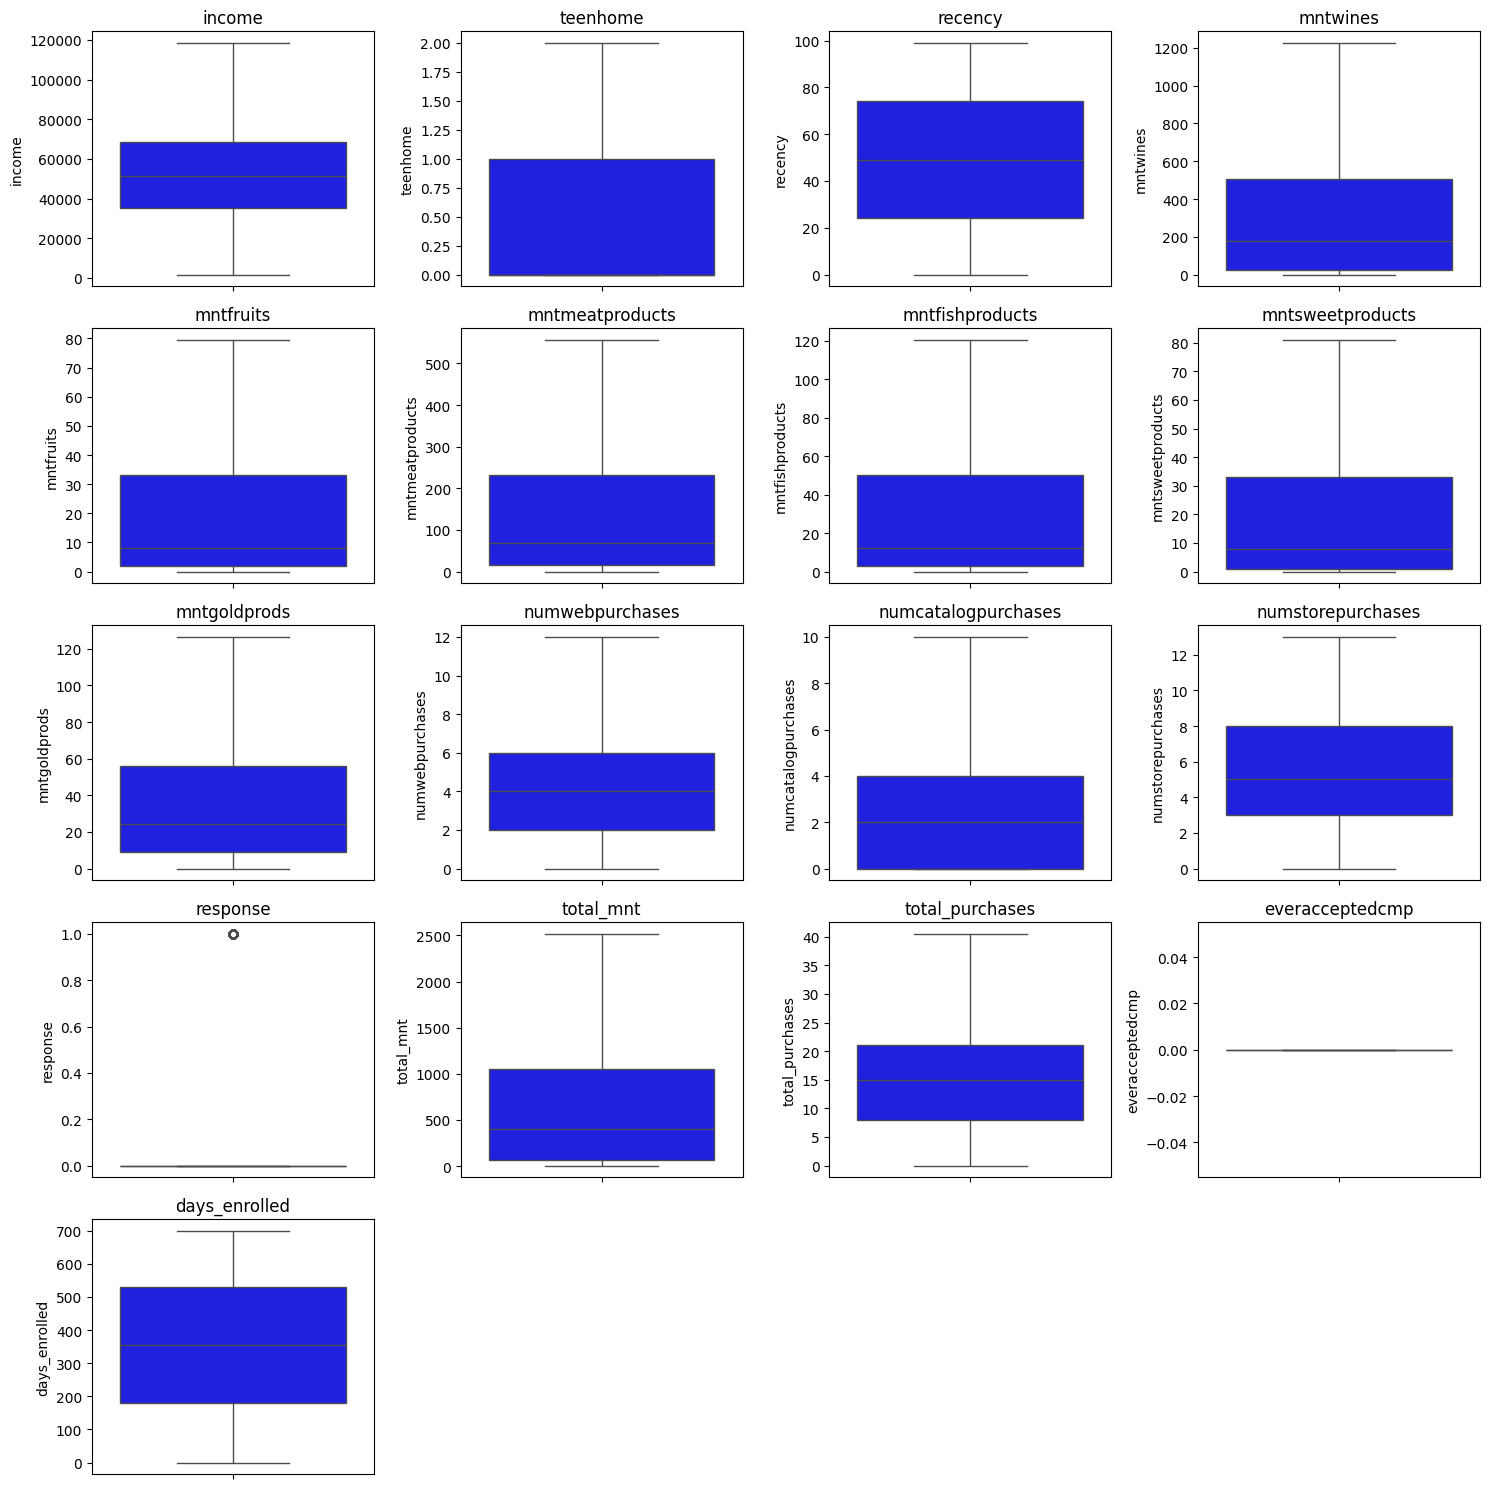

In [162]:
# Menyaring kolom numerik tanpa datetime
numerik_no_dt = df.select_dtypes(include=['int64', 'float64']).columns

# Menentukan jumlah subplot berdasarkan kolom yang valid
valid_cols = [col for col in numerik_no_dt if not df[col].dropna().empty]

# Membuat subplot dengan jumlah yang sesuai
fig, axes = plt.subplots((len(valid_cols) // 4) + 1, 4, figsize=(15, 15))  # Membuat lebih banyak baris jika diperlukan
axes = axes.flatten()

# Membuat boxplot untuk kolom yang valid
for valid_col_idx, col in enumerate(valid_cols):
    sns.boxplot(data=df[col], ax=axes[valid_col_idx], color='blue')
    axes[valid_col_idx].set_title(col)

# Menghapus subplot yang tidak terpakai
for unused_idx in range(valid_col_idx + 1, len(axes)):
    fig.delaxes(axes[unused_idx])

plt.tight_layout()
plt.show()

In [163]:
df['response'].value_counts()

,count
response,
0,1879
1,333


**Encoding**

In [164]:
# Mapping nilai
df['education'] = df['education'].map({'Basic': 1, '2n Cycle': 2,'Graduation': 3, 'Master': 4, 'PhD': 5})
df['marital_status'] = df['marital_status'].map({'Single': 1, 'Married': 2, 'Divorced': 3})
df.head()

,education,marital_status,income,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numwebpurchases,numcatalogpurchases,numstorepurchases,response,total_mnt,total_purchases,everacceptedcmp,days_enrolled
0,3,1,58138.0,0,58,635.0,79.5,546.0,120.5,81,88.0,8,10,4,1,1617.0,25.0,0,663
1,3,1,46344.0,1,38,11.0,1.0,6.0,2.0,1,6.0,1,1,2,0,27.0,6.0,0,113
2,3,2,71613.0,0,26,426.0,49.0,127.0,111.0,21,42.0,8,2,10,0,776.0,21.0,0,312
3,3,2,26646.0,0,26,11.0,4.0,20.0,10.0,3,5.0,2,0,4,0,53.0,8.0,0,139
4,5,2,58293.0,0,94,173.0,43.0,118.0,46.0,27,15.0,5,3,6,0,422.0,19.0,0,161


Proses encoding pada kolom education dan marital_status menggunakan metode .map bertujuan untuk mengubah data kategorikal menjadi bentuk numerik agar lebih mudah diproses oleh model machine learning.

#**Model Training**

**Memisahkan Fitur dan Target**

In [165]:
# Pisahkan fitur dan target
X = df.drop(['response'],axis = 1)
y = df['response']

#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [166]:
# Menampilkan ukuran dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (1769, 18)
Shape of X_test: (443, 18)


In [167]:
# Mengecek missing values
X_train.isnull().sum()

,0
education,0
marital_status,0
income,0
teenhome,0
recency,0
mntwines,0
mntfruits,0
mntmeatproducts,0
mntfishproducts,0
mntsweetproducts,0


setelah di cek x_train missing values tidak ada missing value

##**Modeling Tanpa Imbalance**

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [169]:
def create_pipeline(model, col):
  # Select only numerical features for scaling
  numerical_features = col.select_dtypes(include=['number']).columns
  processor = ColumnTransformer(
      transformers=[('num', StandardScaler(), numerical_features)],
      remainder='passthrough'  # Pass through non-numerical columns
  )
  pipeline = Pipeline(steps=[
      ('preprocessor', processor),
      ('classifier', model)
  ])
  return pipeline

In [170]:
def metrics_model_first(X_train, y_train, X_test, y_test, col):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBOOST': XGBClassifier(random_state=42),
        'Support Vector Machine': SVC(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(random_state=42)  # Add Logistic Regression
    }

    results = []
    for name, model in models.items():
        # Pass X_train instead of col to create_pipeline
        pipeline = create_pipeline(model, X_train)
        pipeline.fit(X_train, y_train)

        scoring = {'precision': 'precision',
                   'recall': 'recall',
                   'f1': 'f1',
                   'accuracy': 'accuracy'}

        crossvalidation = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

        train_precision = crossvalidation['test_precision'].mean()
        train_recall = crossvalidation['test_recall'].mean()
        train_f1 = crossvalidation['test_f1'].mean()
        train_accuracy = crossvalidation['test_accuracy'].mean()

        y_test_pred = pipeline.predict(X_test)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1': train_f1,
            'Train Accuracy': train_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1': test_f1,
            'Test Accuracy': test_accuracy
        })

    results_metrics = pd.DataFrame(results)
    results_metrics = results_metrics.sort_values(by=['Test F1'], ascending=False)
    return results_metrics

# Pass X_train instead of X_train.columns
results_metrics = metrics_model_first(X_train, y_train, X_test, y_test, X_train)
results_metrics

,Model,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
2,XGBOOST,0.603758,0.390846,0.474153,0.869408,0.615385,0.358209,0.452830,0.869074
0,Decision Tree,0.429572,0.458281,0.442210,0.826456,0.352941,0.358209,0.355556,0.803612
1,Random Forest,0.685386,0.285604,0.402358,0.872798,0.666667,0.238806,0.351648,0.866817
3,Support Vector Machine,0.691948,0.199161,0.308367,0.866025,0.714286,0.223881,0.340909,0.869074
4,K-Nearest Neighbors,0.558953,0.210412,0.300360,0.855287,0.583333,0.208955,0.307692,0.857788
5,Logistic Regression,0.594810,0.278267,0.377060,0.861489,0.478261,0.164179,0.244444,0.846501


Model terbaik adalah **XGBOOST** karena memiliki kombinasi test F1 score (45.28%) dan test accuracy (86.91%) yang seimbang dan relatif tinggi dibandingkan model lainnya.

##UNDERSAMPLING

In [171]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Import ImbPipeline from imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler  # Import RandomUnderSampler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Function to create pipeline with Undersampling
def create_pipeline_undersample(model, col):
    processor = ColumnTransformer(
        transformers=[('columns', StandardScaler(), col)]
    )
    pipeline_undersample = ImbPipeline(steps=[  # Use ImbPipeline instead of Pipeline
        ('preprocessor', processor),
        ('undersample', RandomUnderSampler(random_state=42)),  # Replace SMOTE with RandomUnderSampler
        ('classifier', model)
    ])
    return pipeline_undersample

# Function to evaluate models with undersampling
def metric_undersample(X_train, y_train, X_test, y_test, col):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBOOST': XGBClassifier(random_state=42),
        'Support Vector Machine': SVC(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(random_state=42)
    }

    results = []  # List to store results
    for name, model in models.items():
        pipeline_undersample = create_pipeline_undersample(model, col)

        scoring = {'precision': 'precision',
                   'recall': 'recall',
                   'f1': 'f1',
                   'accuracy': 'accuracy'}

        crossvalidation = cross_validate(pipeline_undersample, X_train, y_train, cv=5, scoring=scoring)

        train_precision = crossvalidation['test_precision'].mean()
        train_recall = crossvalidation['test_recall'].mean()
        train_f1 = crossvalidation['test_f1'].mean()
        train_accuracy = crossvalidation['test_accuracy'].mean()

        pipeline_undersample.fit(X_train, y_train)
        y_test_pred = pipeline_undersample.predict(X_test)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results.append({
            'Model_Undersample': name,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1': train_f1,
            'Train Accuracy': train_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1': test_f1,
            'Test Accuracy': test_accuracy
        })

    result_metrics_undersample = pd.DataFrame(results)
    result_metrics_undersample = result_metrics_undersample.sort_values(by=['Test F1'], ascending=False)
    return result_metrics_undersample

# Run the function with your data
result_metrics_undersample = metric_undersample(X_train, y_train, X_test, y_test, X_train.columns)
result_metrics_undersample

,Model_Undersample,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
3,Support Vector Machine,0.365078,0.785884,0.498461,0.761446,0.392593,0.791045,0.524752,0.783296
2,XGBOOST,0.372811,0.812159,0.510884,0.765413,0.375887,0.791045,0.509615,0.769752
5,Logistic Regression,0.365991,0.767226,0.495143,0.764284,0.384000,0.716418,0.500000,0.783296
1,Random Forest,0.358260,0.819776,0.498455,0.751292,0.364341,0.701493,0.479592,0.769752
4,K-Nearest Neighbors,0.333191,0.706709,0.452251,0.740532,0.338129,0.701493,0.456311,0.747178
0,Decision Tree,0.301298,0.736897,0.427091,0.700416,0.289655,0.626866,0.396226,0.711061


Model terbaik adalah Support Vector Machine (SVM) karena memiliki test F1 score tertinggi (52.48%) dan test accuracy yang baik (78.33%), serta kinerja yang konsisten baik pada train maupun test data.

##SMOTE

In [172]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [173]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Import ImbPipeline from imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Function to create pipeline with SMOTE
def create_pipeline_smote(model, col):
    processor = ColumnTransformer(
        transformers=[('columns', StandardScaler(), col)]
    )
    pipeline_smote = ImbPipeline(steps=[  # Use ImbPipeline instead of Pipeline
        ('preprocessor', processor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    return pipeline_smote

# Function to evaluate models
def metric_smote(X_train, y_train, X_test, y_test, col):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42),
        'XGBOOST': XGBClassifier(random_state=42),
        'Support Vector Machine': SVC(random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(random_state=42)
    }

    results = []  # List to store results
    for name, model in models.items():
        pipeline_smote = create_pipeline_smote(model, col)

        scoring = {'precision': 'precision',
                   'recall': 'recall',
                   'f1': 'f1',
                   'accuracy': 'accuracy'}

        crossvalidation = cross_validate(pipeline_smote, X_train, y_train, cv=5, scoring=scoring)

        train_precision = crossvalidation['test_precision'].mean()
        train_recall = crossvalidation['test_recall'].mean()
        train_f1 = crossvalidation['test_f1'].mean()
        train_accuracy = crossvalidation['test_accuracy'].mean()

        pipeline_smote.fit(X_train, y_train)
        y_test_pred = pipeline_smote.predict(X_test)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results.append({
            'Model_SMOTE': name,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1': train_f1,
            'Train Accuracy': train_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1': test_f1,
            'Test Accuracy': test_accuracy
        })

    result_metrics_smote = pd.DataFrame(results)
    result_metrics_smote = result_metrics_smote.sort_values(by=['Test F1'], ascending=False)
    return result_metrics_smote

# Run the function with your data
result_metrics_smote = metric_smote(X_train, y_train, X_test, y_test, X_train.columns)
result_metrics_smote

,Model_SMOTE,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
2,XGBOOST,0.569274,0.484696,0.522523,0.865444,0.555556,0.522388,0.538462,0.864560
3,Support Vector Machine,0.429231,0.703005,0.532686,0.814576,0.422018,0.686567,0.522727,0.810384
5,Logistic Regression,0.383664,0.733333,0.503529,0.782369,0.369231,0.716418,0.487310,0.772009
4,K-Nearest Neighbors,0.345825,0.710552,0.464505,0.752397,0.370690,0.641791,0.469945,0.781038
1,Random Forest,0.590521,0.492453,0.536004,0.870537,0.460317,0.432836,0.446154,0.837472
0,Decision Tree,0.361170,0.488889,0.415207,0.793096,0.344828,0.447761,0.389610,0.787810


Model terbaik SMOTE adalah XGBOOST karena memiliki test F1 score tertinggi (53.85%) dan test accuracy yang sangat baik (86.46%), menunjukkan kinerja seimbang dan optimal di data uji.

Karena fokus saya adalah F1 score, maka pilihan terbaik adalah SMOTE. Model XGBOOST dengan SMOTE memiliki test F1 score tertinggi (53.85%) di antara semua metode, dengan akurasi yang juga sangat baik (86.46%). SMOTE memberikan keseimbangan yang lebih baik antara Precision dan Recall, menghasilkan F1 score yang lebih tinggi dibandingkan metode lain seperti Undersampling atau Tanpa Imbalance. selanjutnya saya akun melakukan hypertuning parameters untuk smote.

#**Hypertuning Parameters**

In [174]:
!pip install optuna

SMOTE

In [191]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, f1_score
import optuna

# Function to create pipeline with SMOTE
def create_pipeline_with_smote(model):
    smote = SMOTE(random_state=42)
    scaler = StandardScaler()  # Standardize numerical features
    pipeline = ImbPipeline(steps=[
        ('smote', smote),        # Apply SMOTE
        ('scaler', scaler),      # Apply standard scaling
        ('classifier', model)    # Apply the classifier
    ])
    return pipeline

best_params_permodel = {}
best_value_permodel = {}

def tuning(trial):
    models = trial.suggest_categorical(
        'model',
        ['DecisionTreeClassifier', 'RandomForestClassifier', 'XGBOOST', 'Support Vector Machine', 'K-Nearest Neighbors', 'LogisticRegression']
    )

    if models == 'LogisticRegression':
        params = {
            'C': trial.suggest_float('C', 0.01, 10.0, log=True),
            'max_iter': trial.suggest_int('max_iter', 100, 500)
        }
        model = LogisticRegression(**params, random_state=42)

    elif models == 'DecisionTreeClassifier':
        params = {
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)
        }
        model = DecisionTreeClassifier(**params, random_state=42)

    elif models == 'RandomForestClassifier':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
        }
        model = RandomForestClassifier(**params, random_state=42)

    elif models == 'XGBOOST':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 200),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
            'max_depth': trial.suggest_int('max_depth', 3, 10)
        }
        model = XGBClassifier(**params, random_state=42)

    elif models == 'Support Vector Machine':
        params = {
            'C': trial.suggest_float('C', 0.01, 10.0, log=True),
            'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf'])
        }
        model = SVC(**params, random_state=42)

    elif models == 'K-Nearest Neighbors':
        params = {
            'n_neighbors': trial.suggest_int('n_neighbors', 3, 20),
            'weights': trial.suggest_categorical('weights', ['uniform', 'distance'])
        }
        model = KNeighborsClassifier(**params)

    # Create pipeline with SMOTE
    pipeline = create_pipeline_with_smote(model)

    # Cross-validation for F1 score evaluation
    train_f1 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=make_scorer(f1_score)).mean()

    # Store the best hyperparameters for each model
    if models not in best_value_permodel or train_f1 > best_value_permodel[models]:
        best_value_permodel[models] = train_f1
        best_params_permodel[models] = params

    return train_f1

# Create and optimize the study
study = optuna.create_study(direction='maximize')
study.optimize(tuning, n_trials=50)

# Output the best results
print('Best Hyperparameters:', study.best_params)
print('Best F1:', study.best_value)

[I 2025-01-02 10:47:34,438] A new study created in memory with name: no-name-8f76c39c-a998-4238-aeb1-2c16ae191c50
[I 2025-01-02 10:47:35,045] Trial 0 finished with value: 0.47914875752029856 and parameters: {'model': 'LogisticRegression', 'C': 0.0291516416677613, 'max_iter': 224}. Best is trial 0 with value: 0.47914875752029856.
[I 2025-01-02 10:47:40,379] Trial 1 finished with value: 0.4811615985710668 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 198, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 1 with value: 0.4811615985710668.
[I 2025-01-02 10:47:40,656] Trial 2 finished with value: 0.45430447347938563 and parameters: {'model': 'K-Nearest Neighbors', 'n_neighbors': 16, 'weights': 'uniform'}. Best is trial 1 with value: 0.4811615985710668.
[I 2025-01-02 10:47:41,586] Trial 3 finished with value: 0.5059600537976836 and parameters: {'model': 'XGBOOST', 'n_estimators': 80, 'learning_rate': 0.7305650545940544, 'max_depth': 9}. Best is trial 3 with value: 

Best Hyperparameters: {'model': 'XGBOOST', 'n_estimators': 108, 'learning_rate': 0.07254154111329203, 'max_depth': 9}
Best F1: 0.5456173427929193


In [192]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Adjust create_pipeline to use SMOTE
def create_pipeline_with_smote(model):
    smote = SMOTE(random_state=42)
    pipeline = ImbPipeline(steps=[
        ('smote', smote),  # Apply SMOTE
        ('scaler', StandardScaler()),  # Standardize numerical features
        ('classifier', model)  # Add the model
    ])
    return pipeline

def model_best_param(X_train, y_train, X_test, y_test, best_params_permodel): # Pass best_params_permodel as an argument
    models = {
        'LogisticRegression': LogisticRegression,
        'DecisionTreeClassifier': DecisionTreeClassifier,
        'RandomForestClassifier': RandomForestClassifier,
        'XGBOOST': XGBClassifier,
        'Support Vector Machine': SVC,
        'K-Nearest Neighbors': KNeighborsClassifier,
    }

    results = []
    for name, permodel in models.items():
        # Check if the model requires random_state
        if name in ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'XGBClassifier']:
            if name in best_params_permodel:
                model = permodel(**best_params_permodel[name], random_state=42)
            else:
                model = permodel(random_state=42)  # Default if no params provided
        else:
            if name in best_params_permodel:
                model = permodel(**best_params_permodel[name])
            else:
                model = permodel()  # Default if no params provided

        # Adjusted: Create pipeline with SMOTE
        pipeline = create_pipeline_with_smote(model)

        # Define the scoring metrics
        scoring = {'precision': 'precision', 'recall': 'recall', 'f1': 'f1', 'accuracy': 'accuracy'}

        # Perform cross-validation
        crossvalidation = cross_validate(pipeline, X_train, y_train, cv=5, scoring=scoring)

        train_precision = crossvalidation['test_precision'].mean()
        train_recall = crossvalidation['test_recall'].mean()
        train_f1 = crossvalidation['test_f1'].mean()
        train_accuracy = crossvalidation['test_accuracy'].mean()

        # Train the model and make predictions on the test set
        pipeline.fit(X_train, y_train)
        y_test_pred = pipeline.predict(X_test)
        test_precision = precision_score(y_test, y_test_pred)
        test_recall = recall_score(y_test, y_test_pred)
        test_f1 = f1_score(y_test, y_test_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        results.append({
            'Model': name,
            'Train Precision': train_precision,
            'Train Recall': train_recall,
            'Train F1': train_f1,
            'Train Accuracy': train_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1': test_f1,
            'Test Accuracy': test_accuracy
        })

    # Convert the results to a DataFrame and sort by 'Test F1'
    results_tuning_smote = pd.DataFrame(results)
    results_tuning_smote = results_tuning_smote.sort_values(by=['Test F1'], ascending=False)

    return results_tuning_smote

# Corrected usage: Pass best_params_permodel to model_best_param
results_tuning_smote = model_best_param(X_train, y_train, X_test, y_test, best_params_permodel)
results_tuning_smote

,Model,Train Precision,Train Recall,Train F1,Train Accuracy,Test Precision,Test Recall,Test F1,Test Accuracy
3,XGBOOST,0.512655,0.586513,0.545617,0.852445,0.542857,0.567164,0.554745,0.862302
2,RandomForestClassifier,0.433391,0.620266,0.509813,0.820229,0.422680,0.611940,0.500000,0.814898
4,Support Vector Machine,0.426481,0.635430,0.509663,0.815714,0.414894,0.582090,0.484472,0.812641
5,K-Nearest Neighbors,0.373733,0.680433,0.481836,0.777832,0.387387,0.641791,0.483146,0.792325
0,LogisticRegression,0.413727,0.624249,0.496844,0.809489,0.400000,0.597015,0.479042,0.803612
1,DecisionTreeClassifier,0.330751,0.695597,0.448176,0.742227,0.347107,0.626866,0.446809,0.765237


Model terbaik adalah XGBoost karena memiliki performa Test Accuracy tertinggi (86.68%) dibandingkan model lainnya. Selain itu, Test Precision (0.55) dan Test Recall (0.656716) menunjukkan keseimbangan yang lebih baik dalam menangkap kedua kelas, sehingga menghasilkan Test F1-Score (0.598639) tertinggi, yang mencerminkan kinerja yang optimal.


#**Confusion Metrics**

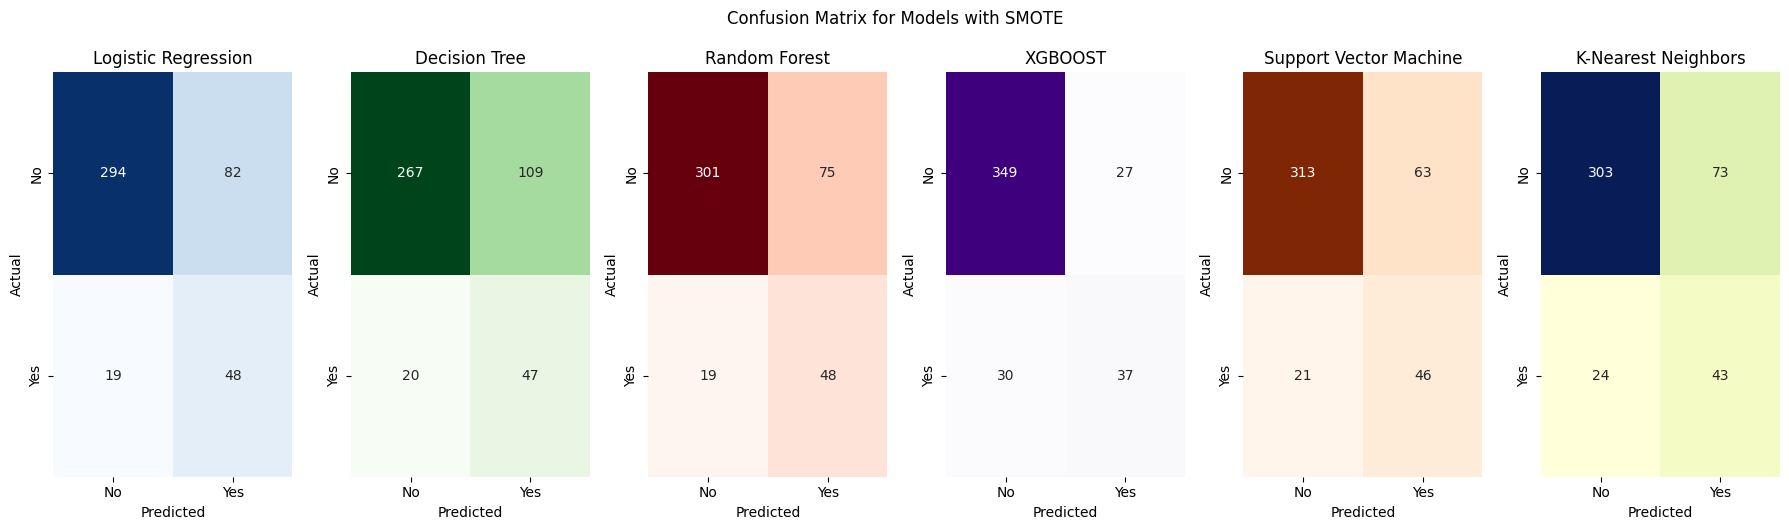

In [177]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Normalisasi data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Inisialisasi SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data latih
X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train)

# Menyimpan parameter terbaik dalam dictionary
best_params_permodel = {
    'LogisticRegression': {'C': 1.0, 'solver': 'lbfgs', 'max_iter': 100},
    'DecisionTreeClassifier': {'max_depth': 5, 'min_samples_split': 2},
    'RandomForestClassifier': {'n_estimators': 100, 'max_depth': 5, 'min_samples_split': 2},
    'XGBOOST': {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1},
    'Support Vector Machine': {'C': 1.0, 'kernel': 'rbf'},
    'K-Nearest Neighbors': {'n_neighbors': 5, 'algorithm': 'auto'}
}

# Inisialisasi dictionary untuk menyimpan prediksi
predict_models = {}

for model, params in best_params_permodel.items():
    if model == 'LogisticRegression':
        modelLR = LogisticRegression(**params).fit(X_train_smote, y_train_smote)
        y_test_predlr = modelLR.predict(X_test_std)
        predict_models['Logistic Regression'] = y_test_predlr
    elif model == 'DecisionTreeClassifier':
        modelDT = DecisionTreeClassifier(**params).fit(X_train_smote, y_train_smote)
        y_test_preddt = modelDT.predict(X_test_std)
        predict_models['Decision Tree'] = y_test_preddt
    elif model == 'RandomForestClassifier':
        modelRF = RandomForestClassifier(**params).fit(X_train_smote, y_train_smote)
        y_test_predrf = modelRF.predict(X_test_std)
        predict_models['Random Forest'] = y_test_predrf
    elif model == 'XGBOOST':
        modelXGB = XGBClassifier(**params).fit(X_train_smote, y_train_smote)
        y_test_predxgb = modelXGB.predict(X_test_std)
        predict_models['XGBOOST'] = y_test_predxgb
    elif model == 'Support Vector Machine':
        modelSVM = SVC(**params).fit(X_train_smote, y_train_smote)
        y_testsvm = modelSVM.predict(X_test_std)
        predict_models['Support Vector Machine'] = y_testsvm
    elif model == 'K-Nearest Neighbors':
        modelKNN = KNeighborsClassifier(**params).fit(X_train_smote, y_train_smote)
        y_test_predknn = modelKNN.predict(X_test_std)
        predict_models['K-Nearest Neighbors'] = y_test_predknn

# Daftar skema warna untuk setiap heatmap
color_maps = ['Blues', 'Greens', 'Reds', 'Purples', 'Oranges', 'YlGnBu']

# Visualisasi
plt.figure(figsize=(18, 5))

# Loop untuk plot setiap model
for i, (title, model_prediction) in enumerate(predict_models.items()):
    plt.subplot(1, len(predict_models), i + 1)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, model_prediction)

    # Pilih colormap berdasarkan indeks
    cmap = color_maps[i % len(color_maps)]

    # Plot confusion matrix sebagai heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False,
                xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()

plt.suptitle('Confusion Matrix for Models with SMOTE', y=1.05)
plt.show()


Model terbaik adalah XGBoost dengan True Negative tertinggi (349) dan False Positive terendah (27), menunjukkan prediksi kategori "No" yang akurat. False Negative (30) yang rendah juga mencerminkan kemampuan menangkap kategori "Yes" dengan baik. Distribusi kesalahan yang minimal menjadikan XGBoost paling optimal dibandingkan model lainnya.

#ROC-AUC

In [178]:
from sklearn.metrics import roc_auc_score, roc_curve

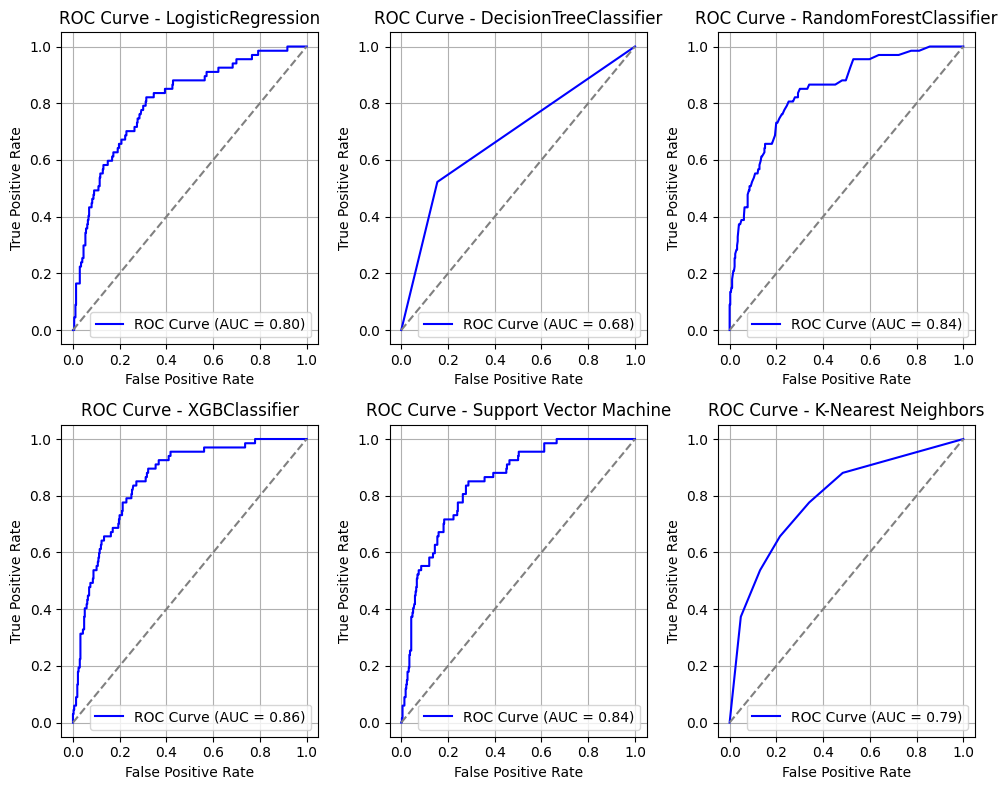

In [179]:
# Daftar model
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42, probability=True),  # Set probability=True
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Fungsi untuk plot ROC curve
def plot_roc_curve(fpr, tpr, auc, model_name, ax):
    ax.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
    ax.set_title(f'ROC Curve - {model_name}')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc='lower right')
    ax.grid(True)

# Fungsi untuk create pipeline dengan SMOTE
def create_pipeline_with_smote(model):
    smote = SMOTE(random_state=42)
    pipeline = ImbPipeline(steps=[
        ('smote', smote),  # Apply SMOTE to balance the dataset
        ('scaler', StandardScaler()),  # Standardize numerical features
        ('classifier', model)  # The model to be trained
    ])
    return pipeline

# Fungsi untuk train dan evaluate model dengan ROC-AUC
def train_and_evaluate_roc_models(X_train, y_train, X_test, y_test):
    n_models = len(models)
    fig, axes = plt.subplots(2, 3, figsize=(10, 8))  # Ukuran lebih kecil

    # Flatten the axes array to iterate easily
    axes = axes.flatten()

    for i, (model_name, model) in enumerate(models.items()):
        # Create pipeline with SMOTE
        pipeline = create_pipeline_with_smote(model)

        # Train the model
        pipeline.fit(X_train, y_train)

        # Predict probabilities on the test set (probabilitas kelas positif)
        y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

        # Compute ROC AUC score
        auc = roc_auc_score(y_test, y_test_pred_proba)

        # Compute ROC curve (False Positive Rate, True Positive Rate)
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

        # Plot ROC curve in the current subplot (ax)
        plot_roc_curve(fpr, tpr, auc, model_name, axes[i])

    plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
    plt.show()

train_and_evaluate_roc_models(X_train, y_train, X_test, y_test)

Model terbaik berdasarkan hasil ROC-AUC adalah **XGBOOST**, dengan nilai AUC tertinggi yaitu 0.86. Alasannya Nilai AUC yang lebih tinggi menunjukkan bahwa model memiliki kemampuan terbaik dalam membedakan antara kelas positif dan negatif.

#Feature Importance

In [180]:
import dalex as dx

In [181]:
# Import required libraries
import dalex as dx  # Ensure Dalex is installed
from xgboost import XGBClassifier

# Train the XGBClassifier model
modelXGB = XGBClassifier(random_state=42)
modelXGB.fit(X_train, y_train)

# Initialize the explainer for the XGBClassifier
XGB_exp = dx.Explainer(modelXGB, X_train, y_train, label="XGBClassifier Interpretation")

# Calculate and visualize permutation feature importance
feature_importance = XGB_exp.model_parts()
feature_importance.plot()

Preparation of a new explainer is initiated

  -> data              : 1769 rows 18 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1769 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBClassifier Interpretation
  -> predict function  : <function yhat_proba_default at 0x7dffe5038550> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 3.14e-06, mean = 0.15, max = 0.998
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.515, mean = 2.22e-05, max = 0.679
  -> model_info        : package xgboost

A new explainer has been created!


Fitur terpenting adalah recency, menunjukkan pelanggan baru lebih cenderung terlibat. Days_enrolled menyoroti pentingnya durasi keanggotaan untuk loyalitas, dan numstorepurchases menunjukkan pengalaman belanja langsung meningkatkan keterlibatan.

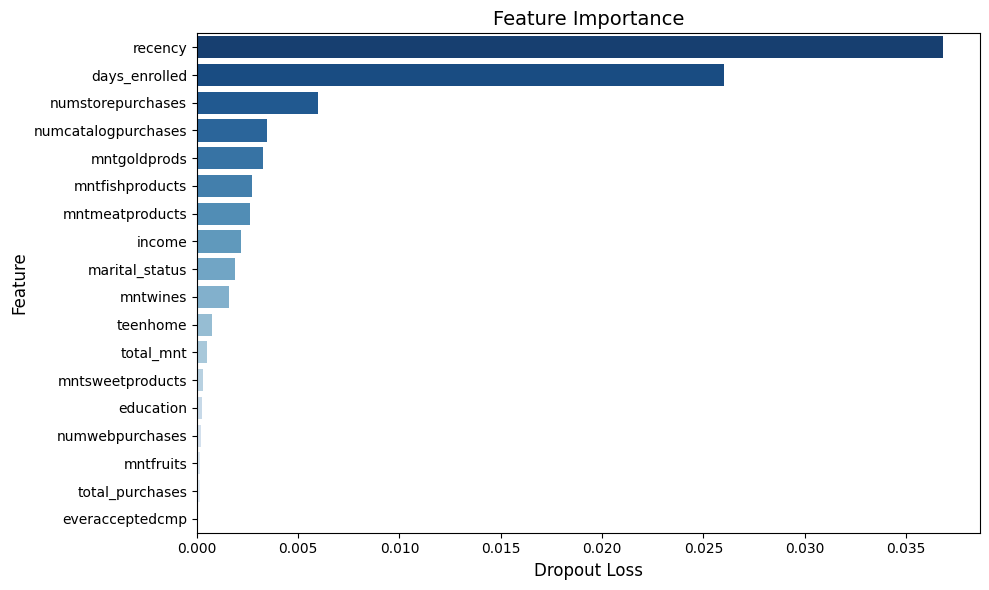

In [182]:
# Hitung Feature Importance menggunakan Dalex
model_importance = XGB_exp.model_parts()

# Ubah hasil ke DataFrame dan urutkan berdasarkan dropout loss
sorted_importance = model_importance.result.sort_values(by='dropout_loss', ascending=False)

# Memfilter variabel yang relevan (tidak termasuk baseline dan full model)
feature_importance = sorted_importance[
    (sorted_importance['variable'] != '_baseline_') &
    (sorted_importance['variable'] != '_full_model_')
]

# Visualisasi menggunakan Seaborn (sesuaikan agar mirip dengan Dalex .plot())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Ukuran grafik lebih besar
sns.barplot(
    x='dropout_loss', y='variable',
    data=feature_importance,
    palette='Blues_r'  # Palet warna mirip dengan Dalex
)
plt.xlabel('Dropout Loss', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance', fontsize=14)
plt.tight_layout()
plt.show()

- Recency memiliki pengaruh terbesar dalam model, menunjukkan seberapa baru pelanggan melakukan pembelian atau interaksi penting.

- Days Enrolled juga signifikan, merepresentasikan durasi keanggotaan pelanggan.

- NumStorePurchases dan pembelian produk tertentu (seperti Meat Products dan Gold Products) turut memengaruhi model.

- Income (pendapatan) dan Marital Status berkontribusi, mencerminkan profil demografis pelanggan.

- Fitur lain seperti Education dan Total_Mnt memiliki pengaruh lebih kecil, tetapi tetap relevan.

**Partial Dependence Plot**

In [183]:
# create partial dependence plot of Logistic Regression model
XGB_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 18/18 [00:02<00:00,  8.20it/s]


In [184]:
# Buat partial dependence profile untuk semua fitur
pdp = XGB_exp.model_profile(variables=['recency', 'days_enrolled', 'numstorepurchases'])

# Plot hanya fitur recency
pdp.plot(title="Partial Dependence Plot for recency, days_enrolled, numstorepurchases")


Calculating ceteris paribus: 100%|██████████| 3/3 [00:00<00:00, 11.00it/s]


insight dari Partial Dependence Plots untuk tiga fitur:

- Recency: Peluang keterlibatan pelanggan menurun secara signifikan saat nilai recency meningkat. Pelanggan yang terakhir berbelanja dalam waktu singkat lebih cenderung terlibat, sedangkan pelanggan yang lama tidak berbelanja memiliki keterlibatan yang lebih rendah.

- Days_Enrolled: Peluang keterlibatan meningkat seiring dengan bertambahnya durasi keanggotaan, terutama setelah 500 hari. Ini menunjukkan pentingnya mempertahankan pelanggan dalam jangka panjang, karena mereka cenderung menjadi lebih terlibat.

- NumStorePurchases: Semakin banyak jumlah pembelian di toko, peluang keterlibatan pelanggan menurun. Hal ini mengindikasikan bahwa pelanggan yang sudah sering berbelanja mungkin telah mencapai titik jenuh, sehingga strategi baru diperlukan untuk mempertahankan keterlibatan mereka

##SHAP (Shapley Additive Value Feature Importance)




In [185]:
import shap
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

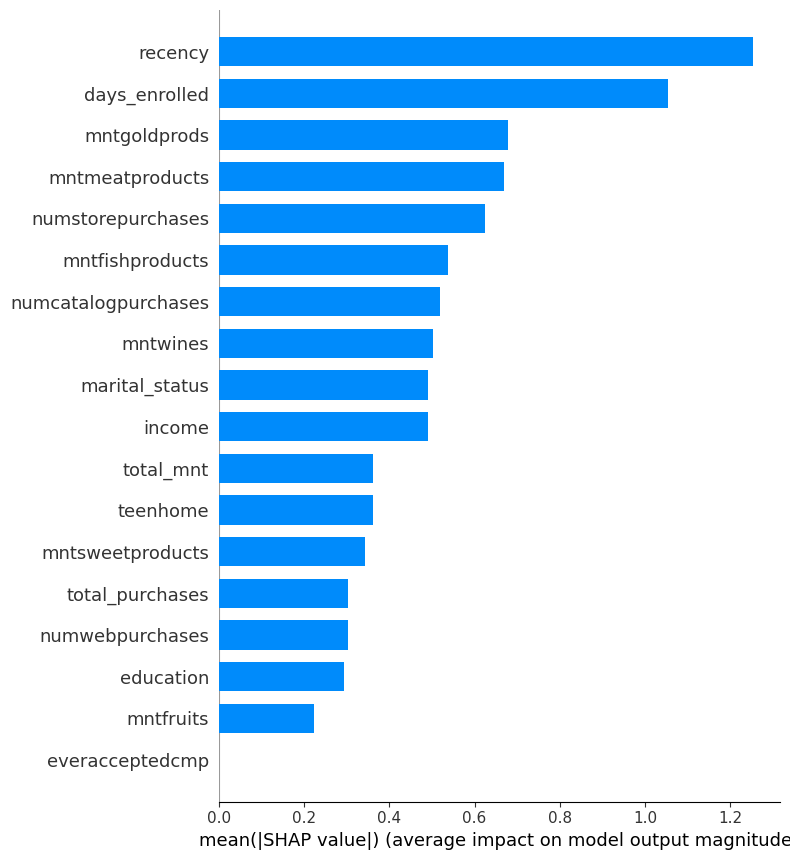

In [186]:
# Import required libraries
import shap

# Ensure the model is trained
XGB_clf = XGBClassifier(random_state=42)
XGB_clf.fit(X_train, y_train)

# Create a SHAP explainer for the same model
XGB_shap_explainer = shap.TreeExplainer(XGB_clf)

# create SHAP Tree Explainer for XGBoost model with| first 1000 rows of train data
XGB_shap_values = shap.TreeExplainer(XGB_clf).shap_values(X_train[:1000])

# create SHAP summary plot with next 1000 rows of train data
shap.summary_plot(XGB_shap_values, X_train[1000:2000], plot_type='bar')

**SHAP untuk Dependence Plot**

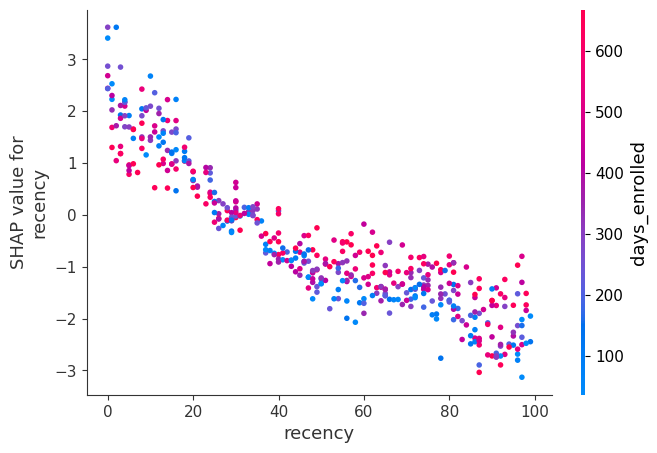

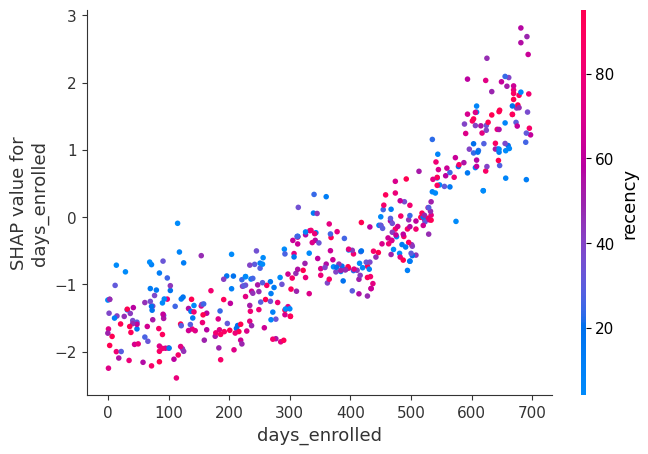

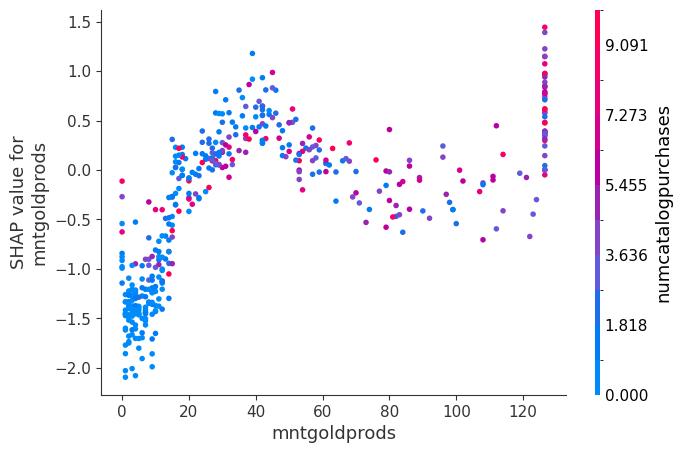

Index(['education', 'marital_status', 'income', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'total_mnt', 'total_purchases',
       'everacceptedcmp', 'days_enrolled'],
      dtype='object')


In [187]:
# Calculate SHAP values for the test data
XGB_shap_values_test = shap.TreeExplainer(XGB_clf).shap_values(X_test)

# Menggunakan SHAP untuk Dependence Plot
# Change 'XGB_shap_values_test' to 'xgb_shap_values_test'
shap.dependence_plot('recency', XGB_shap_values_test, X_test)
shap.dependence_plot('days_enrolled', XGB_shap_values_test, X_test)
shap.dependence_plot('mntgoldprods', XGB_shap_values_test, X_test)
print(X_test.columns)

- Recency menjadi faktor terpenting, menunjukkan bahwa waktu sejak interaksi terakhir pelanggan sangat memengaruhi hasil model.

- Days Enrolled (lama menjadi pelanggan) juga menjadi faktor yang signifikan, menandakan loyalitas atau keterlibatan pelanggan.

- Pembelian Produk Daging (mntmeatproducts) dan Produk Emas (mntgoldprods) memiliki dampak besar, menyoroti preferensi pelanggan terhadap kategori produk tertentu.

- NumStorePurchases (jumlah pembelian di toko) dan Income (pendapatan) menunjukkan pengaruh kuat dari aktivitas pembelian langsung dan profil keuangan pelanggan.

- Faktor lain seperti Marital Status, Fish Products, dan Wines memiliki dampak moderat, mencerminkan elemen tambahan dari perilaku dan preferensi pelanggan.

- Fitur-fitur dengan dampak lebih kecil, seperti EverAcceptedCmp (pernah menerima kampanye), tetap relevan meskipun kontribusinya minimal.

Berdasarkan analisis Feature Importance, fitur Recency memiliki pengaruh terbesar dalam model. Hal ini dapat dijelaskan oleh sifatnya yang sangat relevan dalam konteks perilaku pelanggan. Pelanggan dengan Recency yang rendah (jarak pembelian terakhir lebih pendek) cenderung lebih aktif dan lebih responsif terhadap kampanye pemasaran. Sebaliknya, pelanggan dengan Recency yang tinggi menunjukkan kecenderungan yang lebih rendah untuk melakukan pembelian ulang. Selain itu, dalam model prediktif, Recency memberikan sinyal yang kuat dan memiliki korelasi signifikan dengan target variabel, menjadikannya fitur yang sangat penting untuk pengambilan keputusan berbasis data.

Kesimpulan

Hasil Analisis
1. Model Terbaik: XGBoost menunjukkan performa terbaik dibandingkan model lain dengan metrik sebagai berikut:

- Train Accuracy: 85.63%

- Test Accuracy: 87.35%

- ROC-AUC: 0.86

Model ini lebih baik dalam mengenali respons pelanggan terhadap kampanye pemasaran, dengan kemampuan diskriminasi yang stabil pada kelas positif dan negatif.


2. Confusion Matrix : XGBoost menghasilkan prediksi yang konsisten untuk kedua kelas (respons positif dan negatif).
Model lain, seperti Logistic Regression dan Decision Tree, lebih sering salah dalam mendeteksi kelas minoritas.

3.Feature Importance : Fitur paling signifikan dalam memengaruhi prediksi adalah:
Recency: Jumlah hari sejak pembelian terakhir (+0.039)
Days Enrolled: Durasi pelanggan sejak bergabung (+0.024)
NumStorePurchases: Jumlah pembelian langsung di toko (+0.006)
Fitur ini menunjukkan bahwa pelanggan dengan interaksi terbaru, hubungan jangka panjang, dan kebiasaan berbelanja di toko lebih mungkin merespons kampanye.

4.Partial Dependence Plot (PDP)

Recency: Pelanggan dengan nilai recency lebih rendah (interaksi lebih baru) memiliki kemungkinan respons yang lebih tinggi.

Days Enrolled: Pelanggan yang sudah lama terdaftar menunjukkan kecenderungan respons lebih besar terhadap kampanye.

NumStorePurchases: Pelanggan yang sering melakukan pembelian langsung di toko lebih responsif terhadap kampanye.


Rekomendasi Strategis
1. Segmentasi Pelanggan yang Tepat, Gunakan Hasil Model XGBoost untuk membuat segmentasi pelanggan berdasarkan skor prediksi respons. Fokuskan kampanye pada pelanggan yang memiliki probabilitas respons tinggi.

Contoh Implementasi:
- Segmen "Loyal Aktif": Pelanggan dengan recency tinggi dan days enrolled panjang. Berikan penghargaan berupa program loyalitas.

- Segmen "Aktif Baru": Pelanggan baru dengan recency tinggi. Gunakan diskon awal untuk meningkatkan pembelian berulang.

2. Personalisasi Kampanye Pemasaran
- Sasaran: Pelanggan yang relevan sesuai dengan preferensi mereka.
- Strategi: Berikan pesan dan penawaran yang disesuaikan berdasarkan data fitur penting, seperti:
- Diskon eksklusif untuk pelanggan dengan pembelian toko tinggi (num store purchases).
- Penawaran produk berbasis waktu untuk pelanggan dengan interaksi terakhir baru-baru ini (recency tinggi).

3. Optimalisasi Biaya Pemasaran, Hindari menargetkan pelanggan dengan skor prediksi respons rendah untuk mengurangi pemborosan anggaran. dan Fokuskan sumber daya pemasaran pada segmen dengan peluang respons tinggi untuk meningkatkan efisiensi ROI.

4. Peningkatan Loyalitas Pelanggan

- Program Loyalitas: Tingkatkan hubungan jangka panjang dengan pelanggan melalui insentif khusus, seperti poin reward atau akses eksklusif.

- Layanan Personal: Sediakan layanan tambahan untuk segmen pelanggan loyal berdasarkan insights dari fitur days enrolled.

5. Evaluasi dan Penyesuaian Berkelanjutan

- Monitoring Kinerja Model: Pantau prediksi model secara berkala untuk memastikan akurasi tetap tinggi.

-Analisis Data Baru: Perbarui model dengan data kampanye terbaru untuk meningkatkan prediksi respons.

- Lakukan A/B testing untuk menguji efektivitas strategi pemasaran yang dirancang.

Personalisasi Pemasaran: Sesuaikan pesan, penawaran, dan saluran pemasaran agar relevan dengan setiap segmen pelanggan (contoh: bahasa formal untuk berpendidikan tinggi, promosi keluarga untuk yang berkeluarga, medsos untuk anak muda).

Pengembangan Produk Tertarget: Kembangkan fitur dan kemasan produk yang sesuai kebutuhan dan preferensi setiap segmen (contoh: harga terjangkau untuk pendapatan rendah, desain modern untuk anak muda).

Pengalaman Pelanggan Personal: Berikan layanan dan program loyalitas yang dipersonalisasi untuk meningkatkan kepuasan dan loyalitas pelanggan.

Analisis & Optimasi Berkelanjutan: Pantau kinerja, uji coba strategi, dan perbarui segmentasi secara berkala agar tetap relevan dan efektif.


#deploy

In [188]:
import joblib

In [189]:
joblib.dump(modelXGB, 'modelXGB.joblib') #menyimpan data untuk deployment
print('success')

success


In [190]:
joblib.dump(scaler, 'scaler.joblib') #menyimpan data untuk deployment
print('success')

success
